<center><H1><span style="color:navy">BIKE SHARING SYSTEM CASE STUDY</span></H1></center>

# <span style="color:teal"><b>INTRODUCTION</b></span>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# <span style="color:teal"><b>1. IMPORTING NECESSARY LIBRARIES</b></span>

In [2]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Date manipulation
import calendar

# Warning ignorance library
import warnings
warnings.filterwarnings("ignore")

# Common codes
pd.options.display.float_format = "{:,.2f}".format # To make all decimal in dataframe with 2 precisions
pd.set_option('display.max_rows', None)

# Data Modeling Libraries
import sklearn
from sklearn.model_selection import train_test_split #To split dataset into Train and Test set
from sklearn.preprocessing import MinMaxScaler #scalling purpose
from sklearn.linear_model import LinearRegression #To build Linear Regression Model
from sklearn.feature_selection import RFE # Feature Engineering
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import datetime
from scipy.stats import pearsonr

sns.set()

# <span style="color:teal"><b>2. Data Loading</b></span>

- Here, we create a pandas Dataframe from the dataset "day.csv" and create a copy of the dataframe.
- The reason to create a copy is to prevent data damage to the main dataset. 
- Further data modelling will be exercised with dataframe copy.

In [98]:
bike_main_df = pd.read_csv("day.csv")
bike_df = bike_main_df.copy()
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit  temp  atemp   hum  windspeed  casual  registered   cnt  
0           2 14.11  18.18 80.58      10.75     331         654   985  
1           2 14.90  17.69 69.61      16.65     131         670   801  
2           1  8.05   9.47 43.73      16.64     120        1229  1349  
3           1  8.20  10.61 59.04      10.74     108        1454  1562  
4           1  9.31  11.46 43.70      12.52      82        1518  1600

# <span style="color:teal"><b> 3. Overview of Dataset </b></span>

- This section is to get first understanding of the dataset in aspects of shape, datatype, missing values and duplicate rows.

In [99]:
# Understand shape of the dataset
bike_df.shape

(730, 16)

In [100]:
# Understanding datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [101]:
# Understanding missing values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [102]:
# Check any duplicates
bike_df[bike_df.duplicated()]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [103]:
# Basic Statistical Understanding
bike_df.describe()

instant  season     yr   mnth  holiday  weekday  workingday  \
count   730.00  730.00 730.00 730.00   730.00   730.00      730.00   
mean    365.50    2.50   0.50   6.53     0.03     3.00        0.68   
std     210.88    1.11   0.50   3.45     0.17     2.01        0.47   
min       1.00    1.00   0.00   1.00     0.00     0.00        0.00   
25%     183.25    2.00   0.00   4.00     0.00     1.00        0.00   
50%     365.50    3.00   0.50   7.00     0.00     3.00        1.00   
75%     547.75    3.00   1.00  10.00     0.00     5.00        1.00   
max     730.00    4.00   1.00  12.00     1.00     6.00        1.00   

       weathersit   temp  atemp    hum  windspeed   casual  registered  \
count      730.00 730.00 730.00 730.00     730.00   730.00      730.00   
mean         1.39  20.32  23.73  62.77      12.76   849.25    3,658.76   
std          0.54   7.51   8.15  14.24       5.20   686.48    1,559.76   
min          1.00   2.42   3.95   0.00       1.50     2.00       20.00   
25%          1.00  13.81  16.89  52.00       9.04   316.25    2,502.25   
50%          1.00  20.47  24.37  62.62      12.13   717.00    3,664.50   
75%          2.00  26.88  30.45  72.99      15.63 1,096.50    4,783.25   
max          3.00  35.33  42.04  97.25      34.00 3,410.00    6,946.00   

           cnt  
count   730.00  
mean  4,508.01  
std   1,936.01  
min      22.00  
25%   3,169.75  
50%   4,548.50  
75%   5,966.00  
max   8,714.00

***Summary:***
 - The dataset has 730 rows and 16 features (columns).
 - Out of 16 columns, 11 are int type, 4 are float type and 1 is object type.
 - No missing values found.
 - No duplicate rows found.
 - In basic statistical data, some discrepancies found in columns:
     - humidity - have 0.0 as min value and need treatment.
     - yr, mnth, holiday, weekday, workingday, weathersit are in numerical encoded values.
     - cnt  - has high variance. Need to check.

# <span style="color:teal"><b>4. Data Understanding, Data Cleaning and Feature Engineering  </b></span>

In [104]:
bike_df.head(3)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   

   weathersit  temp  atemp   hum  windspeed  casual  registered   cnt  
0           2 14.11  18.18 80.58      10.75     331         654   985  
1           2 14.90  17.69 69.61      16.65     131         670   801  
2           1  8.05   9.47 43.73      16.64     120        1229  1349

##  <span style="color:maroon"><b>4.1 Understaning Unique values of the columns</b></span>

**Get Uniques of the columns to find whether the column is categorical type.**

In [105]:
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

**Observation:**
 - The columns [season, yr, mnth, holiday, weekday, workingday, weathersit] have least unique counts. Indicates these columns are categorical in nature. But, primarily it is 'int' in dataset. Need to convert them.

##  <span style="color:maroon"><b>4.2 Dropping instant and dteday column as they have no weightage for data analysis</b></span>

In [106]:
# Before deleting dteday column let us check the years. To confirm whether the year in date matched with 'yr' column

pd.to_datetime(bike_df['dteday'], format='mixed').dt.year.value_counts()

dteday
2018    365
2019    365
Name: count, dtype: int64

In [107]:
pd.to_datetime(bike_df['dteday'], format='mixed').dt.month.value_counts()

dteday
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [108]:
# Let us cross verify this month extraction with 'mnth' column
bike_df['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [109]:
# Now it is clear that 'yr' and 'mnth' column have correct data in compare with 'dteday'
bike_df = bike_df.drop(['instant','dteday'], axis=1)

In [110]:
bike_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit  temp  atemp  \
0       1   0     1        0        6           0           2 14.11  18.18   
1       1   0     1        0        0           0           2 14.90  17.69   
2       1   0     1        0        1           1           1  8.05   9.47   
3       1   0     1        0        2           1           1  8.20  10.61   
4       1   0     1        0        3           1           1  9.31  11.46   

    hum  windspeed  casual  registered   cnt  
0 80.58      10.75     331         654   985  
1 69.61      16.65     131         670   801  
2 43.73      16.64     120        1229  1349  
3 59.04      10.74     108        1454  1562  
4 43.70      12.52      82        1518  1600

## <span style="color:maroon"><b>4.3. Understaning value counts of the columns [season, yr, mnth, holiday, weekday, workingday, weathersit]</b></span>

**Get value counts for the columns [season, yr, mnth, holiday, weekday, workingday, weathersit] as they have least unique counts**

In [111]:
col_list = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in col_list:
    print(bike_df[i].value_counts())

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
workingday
1    499
0    231
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


- These columns are 'int' type in dataset. But, it is found that the data in these columns are categorical in nature with some notations. 
- Hence in reference with given Data Dictionary, let us transform the data.

## <span style="color:maroon"><b>4.4.Label Encoding for the columns - ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']</b></span>

- For the purpose of better readability and univariate analysis, we shall do Label Encoding for these columns in reference with given Data Dictionary.

In [112]:
try:
    # Coverting 'season' column - (1:spring, 2:summer, 3:fall, 4:winter)
    bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer',3:'fall', 4:'winter'})

    # Converting 'yr' column - (0: 2018, 1:2019)
    bike_df['yr'] = bike_df['yr'].map({0:'2018', 1:'2019'})

    # Converting 'mnth' column - Month name for respective number. Though the number itself is enough to understand, but for better
    # readability we substitute the month names
    bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_abbr[x])

    # converting 'holiday' column : (0: 'No', 1:'Yes')
    bike_df['holiday'] = bike_df['holiday'].map({0:'No', 1:'Yes'})

    # converting 'Weekday' column : 0: Sunday to 6:Saturday
    bike_df['weekday'] = bike_df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

    # Coverting 'workingday' column - holiday is 1, otherwise is 0
    bike_df['workingday'] = bike_df['workingday'].map({1:'working_day', 0:'weekend_holiday'})

    # Coverting 'weathersit' column - (1: 'Clear_cloudy', 2:'Light_rain_snow', 3:'Heavy_rain_snow') 
    bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear_cloudy', 2:'Light_rain_snow',3:'Heavy_rain_snow'})
except:
    print("Work has already been done")
    
bike_df.head()

season    yr mnth holiday weekday       workingday       weathersit  temp  \
0  spring  2018  Jan      No     Sat  weekend_holiday  Light_rain_snow 14.11   
1  spring  2018  Jan      No     Sun  weekend_holiday  Light_rain_snow 14.90   
2  spring  2018  Jan      No     Mon      working_day     Clear_cloudy  8.05   
3  spring  2018  Jan      No     Tue      working_day     Clear_cloudy  8.20   
4  spring  2018  Jan      No     Wed      working_day     Clear_cloudy  9.31   

   atemp   hum  windspeed  casual  registered   cnt  
0  18.18 80.58      10.75     331         654   985  
1  17.69 69.61      16.65     131         670   801  
2   9.47 43.73      16.64     120        1229  1349  
3  10.61 59.04      10.74     108        1454  1562  
4  11.46 43.70      12.52      82        1518  1600

In [113]:
col_list = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in col_list:
    print(bike_df[i].value_counts())

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64
yr
2018    365
2019    365
Name: count, dtype: int64
mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64
holiday
No     709
Yes     21
Name: count, dtype: int64
weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64
workingday
working_day        499
weekend_holiday    231
Name: count, dtype: int64
weathersit
Clear_cloudy       463
Light_rain_snow    246
Heavy_rain_snow     21
Name: count, dtype: int64


Now the categorical data has been transformed.

## <span style="color:maroon"><b>4.5. Cleaning 'hum' - humidity column having 0.0 value</b></span>

In statistical data, it is found that 'hum' column have 0.0 as min value. Humidity cannot be 0.0. Let us analyse and clean the data

In [114]:
bike_df[bike_df['hum'] == bike_df['hum'].min()]

season    yr mnth holiday weekday   workingday       weathersit  temp  \
68  spring  2018  Mar      No     Thu  working_day  Heavy_rain_snow 15.95   

    atemp  hum  windspeed  casual  registered  cnt  
68  19.28 0.00      17.55      46         577  623

In [115]:
# Replace 0.0 with mean() in 'hum' column.

humidity_mean = round(bike_df['hum'].mean(),2)
bike_df['hum'].mask(bike_df['hum'] == 0.0, humidity_mean, inplace=True)

In [116]:
bike_df.describe()

temp  atemp    hum  windspeed   casual  registered      cnt
count 730.00 730.00 730.00     730.00   730.00      730.00   730.00
mean   20.32  23.73  62.85      12.76   849.25    3,658.76 4,508.01
std     7.51   8.15  14.05       5.20   686.48    1,559.76 1,936.01
min     2.42   3.95  18.79       1.50     2.00       20.00    22.00
25%    13.81  16.89  52.05       9.04   316.25    2,502.25 3,169.75
50%    20.47  24.37  62.71      12.13   717.00    3,664.50 4,548.50
75%    26.88  30.45  72.99      15.63 1,096.50    4,783.25 5,966.00
max    35.33  42.04  97.25      34.00 3,410.00    6,946.00 8,714.00

## <span style="color:maroon"><b>4.6. Numerical and Categorical Variables </b></span>

Let's create the lists of numerical and categorical variables. It will be useful for further data analysis

In [117]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


In [118]:
numerical_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']
categorical_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

## <span style="color:maroon"><b>4.7. Analysing Outliers in Numerical Variables</b></span>

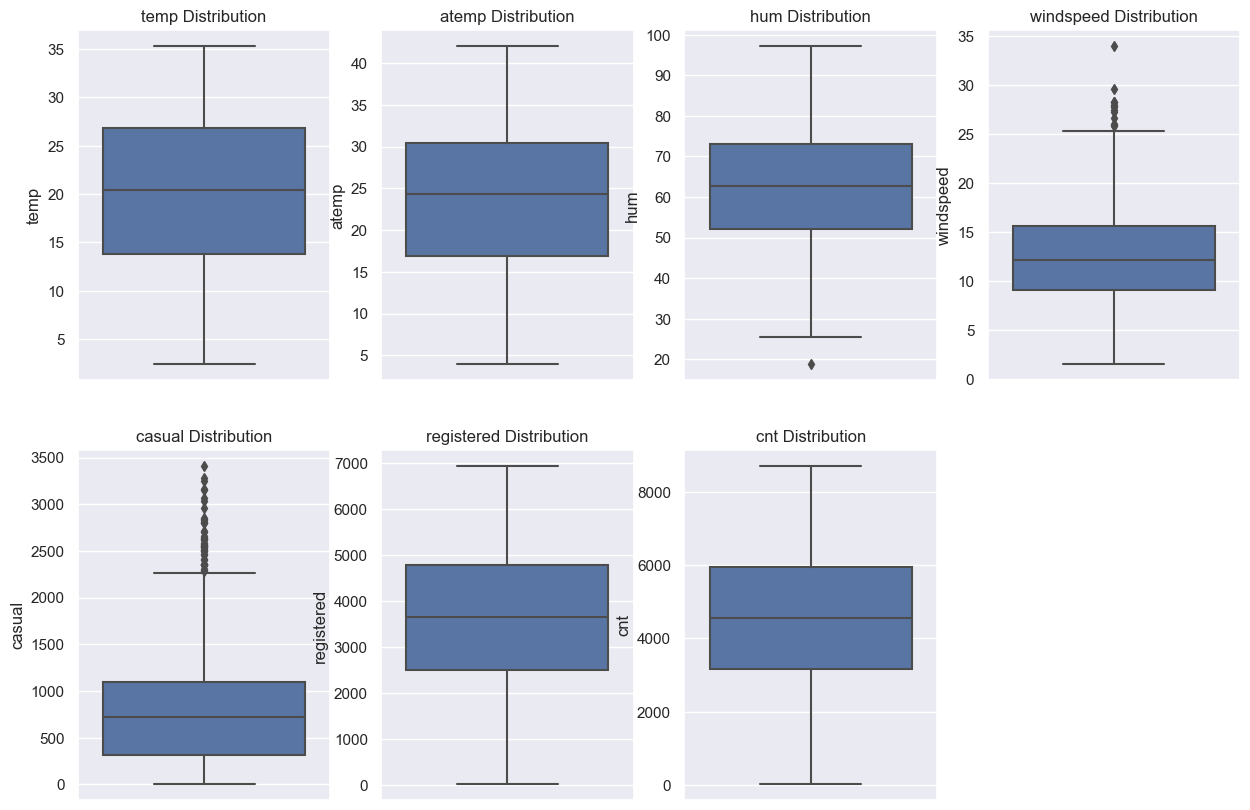

In [119]:
plt.figure(figsize=(15,10))
rows, columns, place = 2, 4, 1
for feature in numerical_cols:
    plt.subplot(rows, columns, place)
    sns.boxplot(y=feature, data=bike_df)
    plt.title(f'{feature} Distribution')
    place += 1
plt.show()

With this graph, it is difficult to interpret the outliers. The same will be exercised with plotly express library for more readability.

In [120]:
# Let us interprete the columns with plotly express library : 'hum','windspeed','casual'

# hum column
px.box(bike_df,x='hum',width=700,height=250, labels={'hum':'hum : Humidity'}).show()

# Windspeed column
px.box(bike_df,x='windspeed',width=700,height=250, labels={'windspeed':'Wind Speed'}).show()

# Casual column
px.box(bike_df,x='casual',width=700,height=250, labels={'casual':'Casual Registration'}).show()

**Observation:**
- Though the columns [hum, windspeed and casual] have outliers by the visualization, with domain view, these values are in legitimate range. Hence, no need to treat them.

# <span style="color:teal"><b>5. DATA ANALYSIS </b></span>

## <span style="color:MAROON"><b>5.1 Univariate Analysis - Analysing Data Distribution - Categorical Variables </b></span>

season
fall     25.75
summer   25.21
spring   24.66
winter   24.38
Name: count, dtype: float64
----------------
yr
2018   50.00
2019   50.00
Name: count, dtype: float64
----------------
mnth
Jan   8.49
Mar   8.49
May   8.49
Jul   8.49
Aug   8.49
Oct   8.49
Dec   8.49
Apr   8.22
Jun   8.22
Sep   8.22
Nov   8.22
Feb   7.67
Name: count, dtype: float64
----------------
holiday
No    97.12
Yes    2.88
Name: count, dtype: float64
----------------
weekday
Sat   14.38
Sun   14.38
Mon   14.38
Tue   14.25
Thu   14.25
Fri   14.25
Wed   14.11
Name: count, dtype: float64
----------------
workingday
working_day       68.36
weekend_holiday   31.64
Name: count, dtype: float64
----------------
weathersit
Clear_cloudy      63.42
Light_rain_snow   33.70
Heavy_rain_snow    2.88
Name: count, dtype: float64
----------------


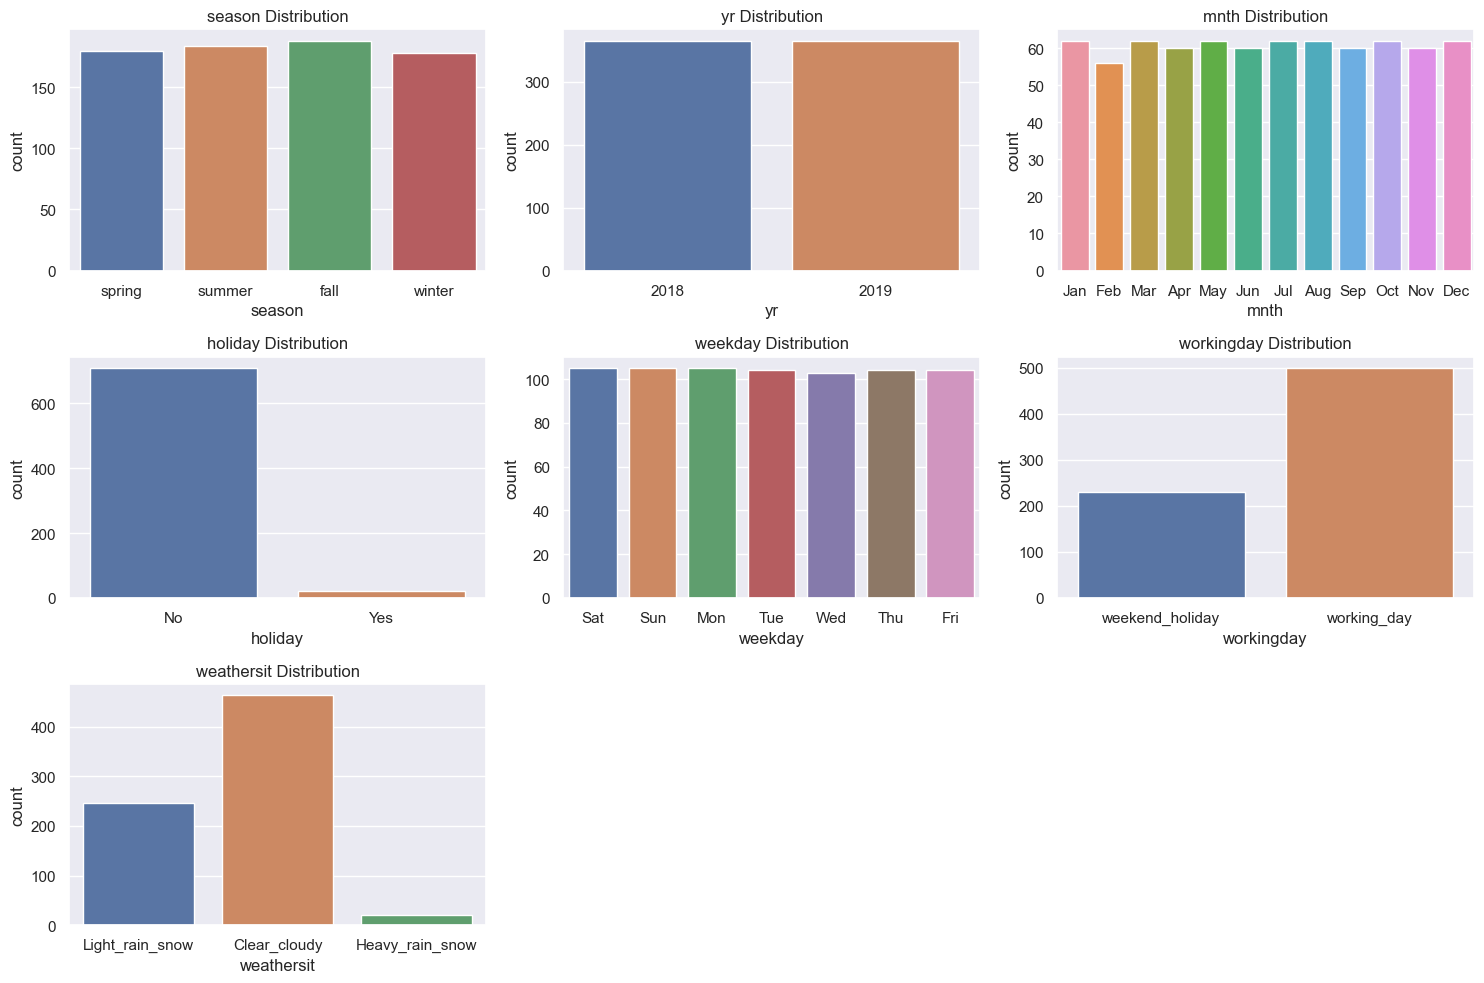

In [26]:
# Plotting bar plot for categorical variables to understand how the data are distributed in each variable

plt.figure(figsize=(15,10))
rows, columns, place = 3, 3, 1
for feature in categorical_cols:
    print(bike_df[feature].value_counts()*100/bike_df[feature].count())
    print("----------------")
    plt.subplot(rows, columns, place)
    sns.countplot(x=feature, data=bike_df)
    plt.title(f'{feature} Distribution')
    place += 1
plt.tight_layout()
plt.show()

**Observation:**
- In Season, Year, months, weekdays, the data are almost equally distributed.
- Wheareas in weathersit, holiday and working day, the data have variations.
    - **In weather sit**, Clear_cloudy has 63.42% of data, Light_rain_snow has 33.70%, Heavy_rain_snow has 2.88%. It indicates, people are more likely to ride in clear_cloudy weather situation, followed by Light_rain_snow.
    - **In working days**, non-working days have more data 68.36%. It indicated,  the people are more likely to have ride service during weekends/holidays
    - **In holiday**, the data are highly distributed and huge variation. Nearly 98% - 2% subset of No Holiday and Holiday. It is better to drop. It is controversial that how whole two year would be holidays and seems controversial with 'Workinkday' columm. In addition to that, this day is derived from a external website. Hence, it can be dropped.

## <span style="color:MAROON"><b>5.2  Dropping 'holiday' column </b></span>

In [27]:
bike_df.head(2)

season    yr mnth holiday weekday       workingday       weathersit  temp  \
0  spring  2018  Jan      No     Sat  weekend_holiday  Light_rain_snow 14.11   
1  spring  2018  Jan      No     Sun  weekend_holiday  Light_rain_snow 14.90   

   atemp   hum  windspeed  casual  registered  cnt  
0  18.18 80.58      10.75     331         654  985  
1  17.69 69.61      16.65     131         670  801

In [28]:
bike_df.drop('holiday', axis=1, inplace=True)
categorical_cols.remove('holiday') # remove 'holiday' from categorical_cols list
categorical_cols

['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

In [29]:
bike_df.head(2) # holiday is removed

season    yr mnth weekday       workingday       weathersit  temp  atemp  \
0  spring  2018  Jan     Sat  weekend_holiday  Light_rain_snow 14.11  18.18   
1  spring  2018  Jan     Sun  weekend_holiday  Light_rain_snow 14.90  17.69   

    hum  windspeed  casual  registered  cnt  
0 80.58      10.75     331         654  985  
1 69.61      16.65     131         670  801

## <span style="color:MAROON"><b>5.3 Bivariate Analysis - Categorical Variables - Outline analysis</b></span>

In [30]:
categorical_cols

['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

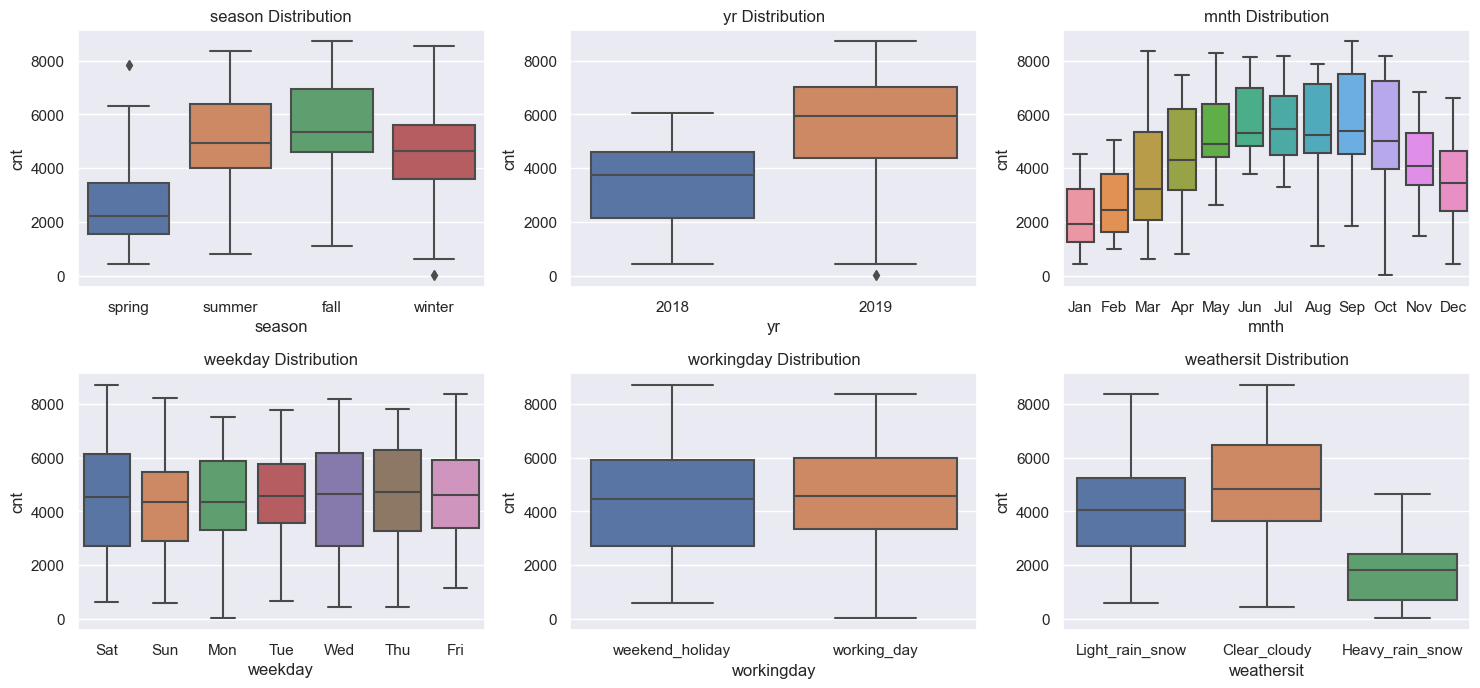

In [31]:
# Plotting box plot for categorical variables across 'cnt' to understand how the categorical variables are reacted to 'cnt'.

plt.figure(figsize=(15,10))
rows, columns, place = 3, 3, 1
for feature in categorical_cols:
    plt.subplot(rows, columns, place)
    sns.boxplot(x=feature, y='cnt', data=bike_df)
    plt.title(f'{feature} Distribution')
    place += 1
plt.tight_layout()
plt.show()

**Observation:**
- Season: More ride count observed in 'summer & fall season'. Fall season has highest record.
- Year : Ride count is higher in 2019 than 2018. It indicates the bike service is keep increasing year-on-year.
- Month: The plot indicates the ride count data is normally distributed across the months. Also observed that from Apr to Oct the bike services are in good range. Means Summer and fall season.
- Weekday: Median is almost same in all weekdays
- Working days: Median is almost same in both working and non-working days
- Weather Situation: Clear_cloudy and Light rain has more sign of bike service avail rather than heavy_rain

##  <span style="color:MAROON"><b>5.4. Bivariate Analysis - Categorical Variables - In-depth analysis</b></span>

In [32]:
categorical_cols

['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

In [33]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,round(y[i],2), ha='center', va = 'baseline', color='white')


### <span style="background-color:navy;color:white"><b> 5.4.1 Understanding years and ride count </b></span>

In [34]:
year_cnt_dist = bike_df.groupby(by='yr').cnt.mean()
year_casual_dist = bike_df.groupby(by='yr').casual.mean()
year_reg_dist = bike_df.groupby(by='yr').registered.mean()

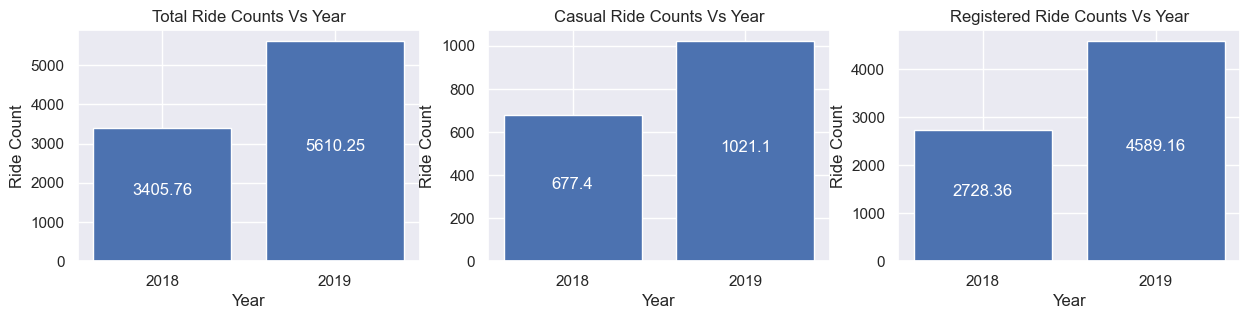

In [35]:
plt.figure(figsize=(15,3))


plt.subplot(1,3,1)
plt.title("Total Ride Counts Vs Year")
plt.bar(year_cnt_dist.index, year_cnt_dist.values)
addlabels(year_cnt_dist.index, year_cnt_dist.values)
plt.xlabel('Year')
plt.ylabel('Ride Count')


plt.subplot(1,3,2)
plt.title("Casual Ride Counts Vs Year")
plt.bar(year_casual_dist.index, year_casual_dist.values)
addlabels(year_casual_dist.index, year_casual_dist.values)
plt.xlabel('Year')
plt.ylabel('Ride Count')

plt.subplot(1,3,3)
plt.title("Registered Ride Counts Vs Year")
plt.bar(year_reg_dist.index, year_reg_dist.values)
addlabels(year_reg_dist.index, year_reg_dist.values)
plt.xlabel('Year')
plt.ylabel('Ride Count')

plt.show()


**Observation**
- The reason to consider casual and registered rides along with 'cnt' ride count is, to get understand about the casual and registered customers. 
- In year comparison, 2019 has more rides than 2018. Means, the customers are increasing y-o-y
- In comparison with casual and registered users, in both 2018 and 2019, registered users are more likely to had ride service.

### <span style="background-color:navy;color:white"><b> 5.4.2 Understanding season and ride count </b></span>

In this section, we going to understand how the ride is spread across seasons. 

In [36]:
season_cnt_dist = bike_df.groupby(by='season').cnt.mean()
season_casual_dist = bike_df.groupby(by='season').casual.mean()
season_reg_dist = bike_df.groupby(by='season').registered.mean()
# print("Season Vs Total ride count", season_cnt_dist)
# print("\nSeason Vs Casual ride count", season_casual_dist)
# print("\nSeason Vs Registered ride count", season_reg_dist)

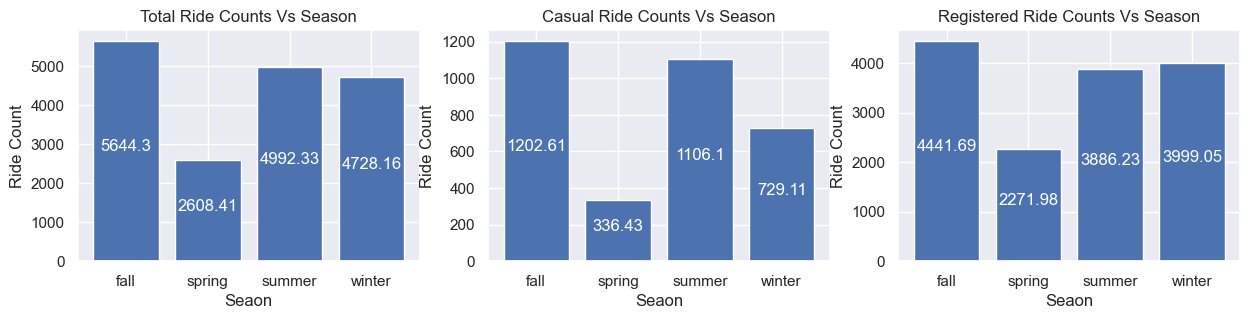

In [37]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.title("Total Ride Counts Vs Season")
plt.bar(season_cnt_dist.index, season_cnt_dist.values)
addlabels(season_cnt_dist.index, season_cnt_dist.values)
plt.xlabel('Seaon')
plt.ylabel('Ride Count')

plt.subplot(1,3,2)
plt.title("Casual Ride Counts Vs Season")
plt.bar(season_casual_dist.index, season_casual_dist.values)
addlabels(season_casual_dist.index, season_casual_dist.values)
plt.xlabel('Seaon')
plt.ylabel('Ride Count')

plt.subplot(1,3,3)
plt.title("Registered Ride Counts Vs Season")
plt.bar(season_reg_dist.index, season_reg_dist.values)
addlabels(season_reg_dist.index, season_reg_dist.values)
plt.xlabel('Seaon')
plt.ylabel('Ride Count')

plt.show()

In [38]:
# Finding mean percentage for the respective season in ride categories
print("Percentage for Total Ride Counts Vs Season")
print((bike_df.groupby(by='season').cnt.mean()/bike_df.groupby(by='season').cnt.mean().sum())*100)

print("\nPercentage for Casual Ride Counts Vs Season")
print((bike_df.groupby(by='season').casual.mean()/bike_df.groupby(by='season').casual.mean().sum())*100)

print("\nPercentage for Registered Ride Counts Vs Season")
print((bike_df.groupby(by='season').registered.mean()/bike_df.groupby(by='season').registered.mean().sum())*100)

Percentage for Total Ride Counts Vs Season
season
fall     31.40
spring   14.51
summer   27.78
winter   26.31
Name: cnt, dtype: float64

Percentage for Casual Ride Counts Vs Season
season
fall     35.64
spring    9.97
summer   32.78
winter   21.61
Name: casual, dtype: float64

Percentage for Registered Ride Counts Vs Season
season
fall     30.42
spring   15.56
summer   26.62
winter   27.39
Name: registered, dtype: float64


**Observation:**
- In overall ride count, the people are more likely to avail ride service during 'fall' season with 31.40%, followed by 'summer' season with 27.78%, next winter with 26.31% and the last is spring with 14.51%. However, rides in summer and winter are nearly equal. 
- In distinguished observation of casual and registered rides seperately, registered customers are more likely to use in fall, summer & winter and least in spring. Wherease casual customers have high usage in fall and summer season, but less in winter and very least in spring.

### <span style="background-color:navy;color:white"><b> 5.4.3. Understanding months and ride count</b></span>

In [39]:
month_cnt_dist = bike_df.groupby(by='mnth').cnt.mean().sort_values()
month_casual_dist = bike_df.groupby(by='mnth').casual.mean().sort_values()
month_reg_dist = bike_df.groupby(by='mnth').registered.mean().sort_values()

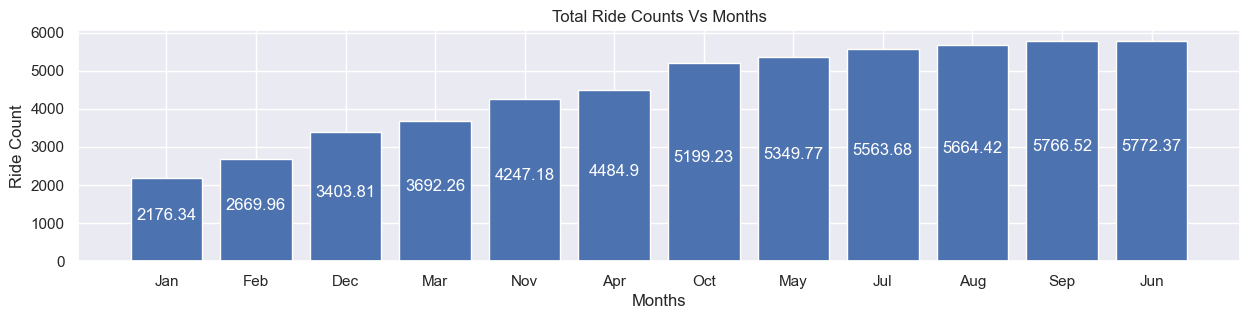

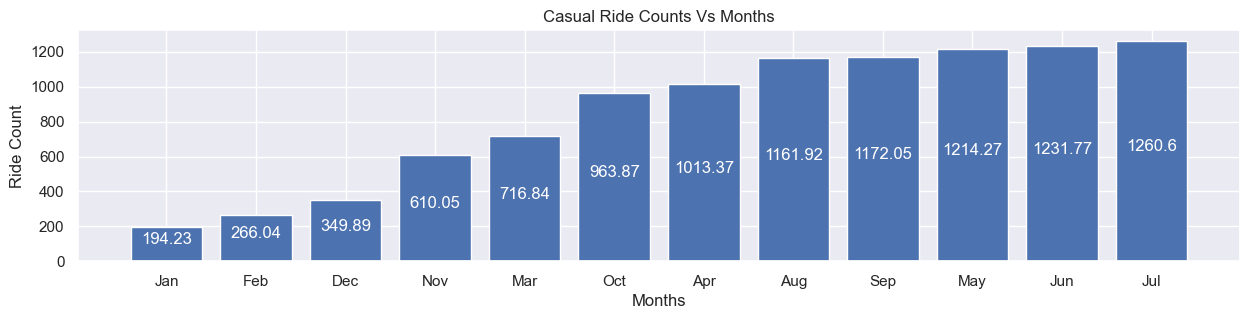

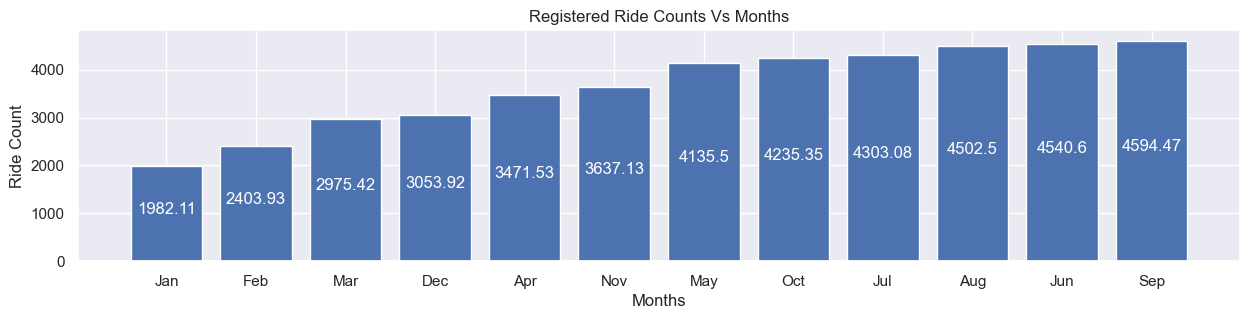

In [40]:
plt.figure(figsize=(15,3))

# plt.subplot(1,1,1)
plt.title("Total Ride Counts Vs Months")
plt.bar(month_cnt_dist.index, month_cnt_dist.values)
addlabels(month_cnt_dist.index, month_cnt_dist.values)
plt.xlabel('Months')
plt.ylabel('Ride Count')
plt.show()

plt.figure(figsize=(15,3))
plt.title("Casual Ride Counts Vs Months")
plt.bar(month_casual_dist.index, month_casual_dist.values)
addlabels(month_casual_dist.index, month_casual_dist.values)
plt.xlabel('Months')
plt.ylabel('Ride Count')
plt.show()

plt.figure(figsize=(15,3))
plt.title("Registered Ride Counts Vs Months")
plt.bar(month_reg_dist.index, month_reg_dist.values)
addlabels(month_reg_dist.index, month_reg_dist.values)
plt.xlabel('Months')
plt.ylabel('Ride Count')

plt.show()

**Observation:**
- In overall ride count, as we already saw in season analysis, the customers are more likely to avail ride services during the months between April and October. In winter season like Jan, Feb, Nov, Dec are less likely to avail services. 
- The same reflects in Casual and registered customers. However,  in registered customers, they have raisen ride count in 'Nov & Dec' i.e., winter season.

### <span style="background-color:navy;color:white"><b> 5.4.4 Understanding weekdays and ride count</b></span>

In [41]:
weekdays_cnt_dist = bike_df.groupby(by='weekday').cnt.mean().sort_values()
weekdays_casual_dist = bike_df.groupby(by='weekday').casual.mean().sort_values()
weekdays_reg_dist = bike_df.groupby(by='weekday').registered.mean().sort_values()

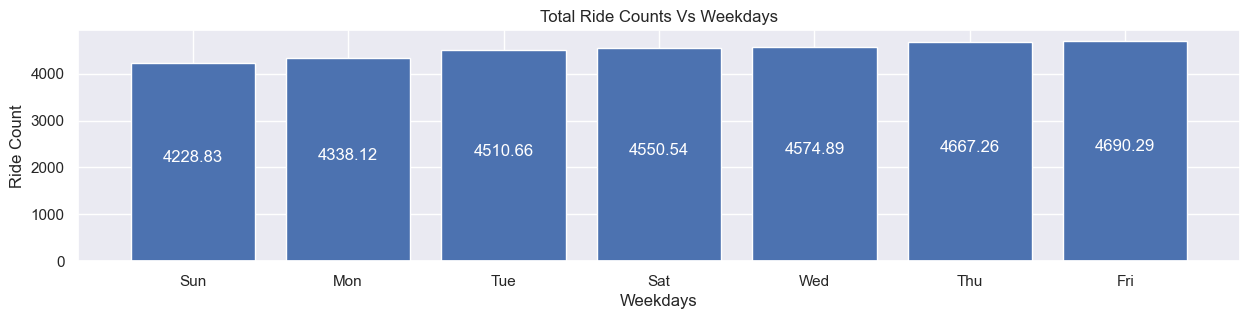

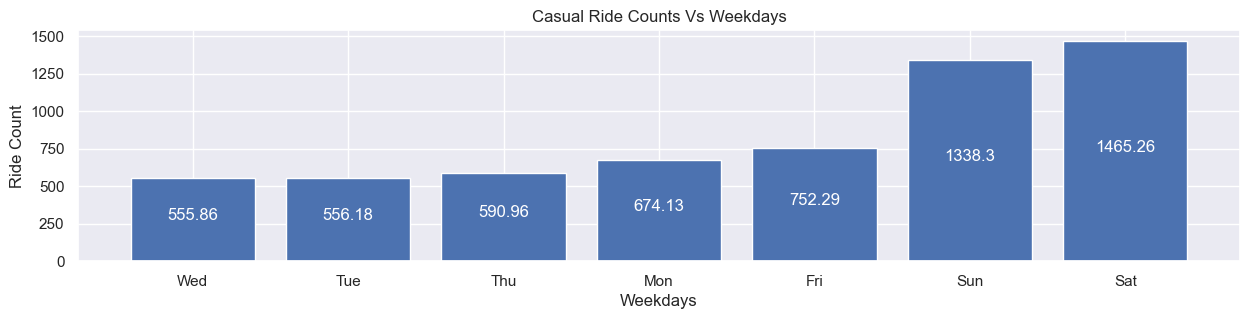

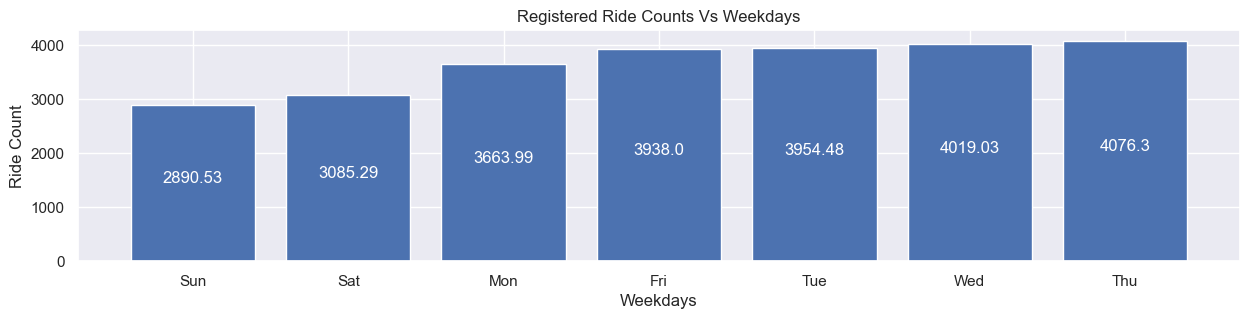

In [42]:
plt.figure(figsize=(15,3))

# plt.subplot(1,1,1)
plt.title("Total Ride Counts Vs Weekdays")
plt.bar(weekdays_cnt_dist.index, weekdays_cnt_dist.values)
addlabels(weekdays_cnt_dist.index, weekdays_cnt_dist.values)
plt.xlabel('Weekdays')
plt.ylabel('Ride Count')
plt.show()

plt.figure(figsize=(15,3))
plt.title("Casual Ride Counts Vs Weekdays")
plt.bar(weekdays_casual_dist.index, weekdays_casual_dist.values)
addlabels(weekdays_casual_dist.index, weekdays_casual_dist.values)
plt.xlabel('Weekdays')
plt.ylabel('Ride Count')
plt.show()

plt.figure(figsize=(15,3))
plt.title("Registered Ride Counts Vs Weekdays")
plt.bar(weekdays_reg_dist.index, weekdays_reg_dist.values)
addlabels(weekdays_reg_dist.index, weekdays_reg_dist.values)
plt.xlabel('Weekdays')
plt.ylabel('Ride Count')

plt.show()

**Observation:**
- In overall ride count, almost all weekdays have same ride counts.
- However, in comparison between casual and registered customers, we can see some significant differences.
    - Casual customers are more likely to avail ride service during weekends (Sunday & Saturday)
    - Whereas registered customers are more likely to avail ride services during weekdays than weekends. Just opposite as casual customers.
    - It might indicate that, most of the registered customers are working professionals used to avail bike service for office travel. 
    
- Also, this chart again proves that registered customers are more likely to avail bike services than casual customers. Hence, targeting working professional might helpful for the business improvement.

### <span style="background-color:navy;color:white"><b> 5.4.5 Understanding workingday and ride count</b></span>

In [43]:
workingday_cnt_dist = bike_df.groupby(by='workingday').cnt.mean()
workingday_casual_dist = bike_df.groupby(by='workingday').casual.mean()
workingday_reg_dist = bike_df.groupby(by='workingday').registered.mean()

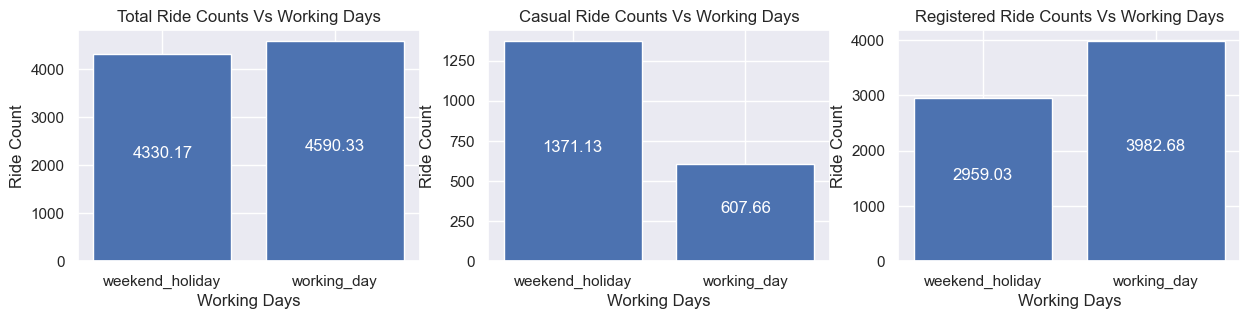

In [44]:
plt.figure(figsize=(15,3))


plt.subplot(1,3,1)
plt.title("Total Ride Counts Vs Working Days")
plt.bar(workingday_cnt_dist.index, workingday_cnt_dist.values)
addlabels(workingday_cnt_dist.index, workingday_cnt_dist.values)
plt.xlabel('Working Days')
plt.ylabel('Ride Count')


plt.subplot(1,3,2)
plt.title("Casual Ride Counts Vs Working Days")
plt.bar(workingday_casual_dist.index, workingday_casual_dist.values)
addlabels(workingday_casual_dist.index, workingday_casual_dist.values)
plt.xlabel('Working Days')
plt.ylabel('Ride Count')

plt.subplot(1,3,3)
plt.title("Registered Ride Counts Vs Working Days")
plt.bar(workingday_reg_dist.index, workingday_reg_dist.values)
addlabels(workingday_reg_dist.index, workingday_reg_dist.values)
plt.xlabel('Working Days')
plt.ylabel('Ride Count')

plt.show()

**Observation:**
- In overall the bike service count is nearly equal in both weekend and weekdays.
- Whereas in distingushed observation between casual and registered customers, it again proves that registered customers are more likely to avail bike service in working days and in controversy, casual customers avail bike service during weekends. 
- The casual customers might be temporary visitors like tourists and weekend travelers.

### <span style="background-color:navy;color:white"><b> 5.4.6. Understanding Weather situation and ride count</b></span>

In [45]:
weathersit_cnt_dist = bike_df.groupby(by='weathersit').cnt.mean()
weathersit_casual_dist = bike_df.groupby(by='weathersit').casual.mean()
weathersit_reg_dist = bike_df.groupby(by='weathersit').registered.mean()

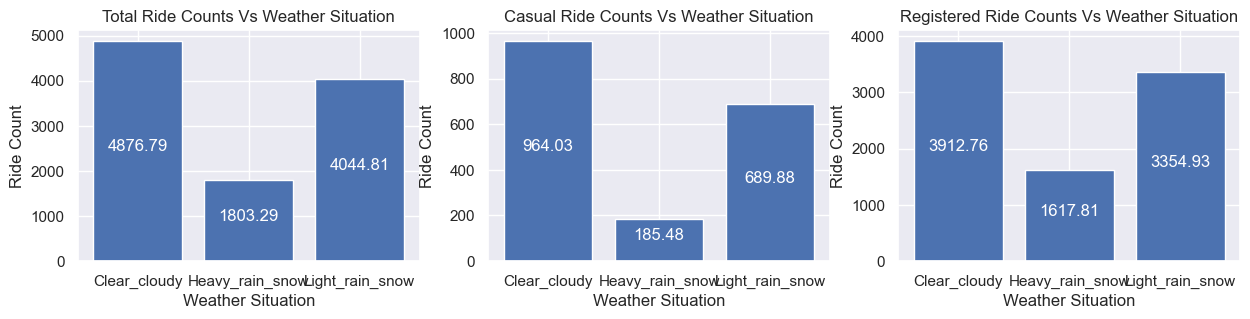

In [46]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.title("Total Ride Counts Vs Weather Situation")
plt.bar(weathersit_cnt_dist.index, weathersit_cnt_dist.values)
addlabels(weathersit_cnt_dist.index, weathersit_cnt_dist.values)
plt.xlabel('Weather Situation')
plt.ylabel('Ride Count')


plt.subplot(1,3,2)
plt.title("Casual Ride Counts Vs Weather Situation")
plt.bar(weathersit_casual_dist.index, weathersit_casual_dist.values)
addlabels(weathersit_casual_dist.index, weathersit_casual_dist.values)
plt.xlabel('Weather Situation')
plt.ylabel('Ride Count')

plt.subplot(1,3,3)
plt.title("Registered Ride Counts Vs Weather Situation")
plt.bar(weathersit_reg_dist.index, weathersit_reg_dist.values)
addlabels(weathersit_reg_dist.index, weathersit_reg_dist.values)
plt.xlabel('Weather Situation')
plt.ylabel('Ride Count')

plt.show()

**Observation:**
- In total ride count, it is observed that people are more likely to avail bike services during Clear sky or mild cloudy weather and followed by Light rain or light snow.
- The same is observed in casual and registered customers.
- During heavy rain or snow, people are not wish avail bike services. However, when compared with casual customers, registered customers have more need for bike service even in high rain or snow weather condition.

### <span style="background-color:navy;color:white"><b> 5.4.7 Summary:</b></span>

- Availing biker service is increasing year-on-year
- More bike services are availed during Fall and Summer seasons.
- During the months from Apr to Oct, the bike service is more availed by the customers.
- **In overall, availing bike service in all weekdays are same. However, Registered customers availed more during weekdays and casual customers availed more in weekends. Generically, when considering total ride count, all weekdays are same. But, in distinguished aspect of casual and registered cusotmers, all weekdays are not same.**
- **In point of adding proof to weekday analysis, 'working day' analysis again says the registered customers are more in working days and casual cutomers are more in non-working days. From, this we might consider registered customers as working professional who availing more bike service for office travel. Means, working professional avail more bike services**
- In weather situation, customers are more likely to avail bike services during clear or mild weather conditions.

## <span style="color:maroon"><b> 5.5 Univariate Analysis - Analysing Data Distribution - Numerical Variables</b></span>

In [47]:
numerical_cols

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [48]:
bike_df.describe()

temp  atemp    hum  windspeed   casual  registered      cnt
count 730.00 730.00 730.00     730.00   730.00      730.00   730.00
mean   20.32  23.73  62.85      12.76   849.25    3,658.76 4,508.01
std     7.51   8.15  14.05       5.20   686.48    1,559.76 1,936.01
min     2.42   3.95  18.79       1.50     2.00       20.00    22.00
25%    13.81  16.89  52.05       9.04   316.25    2,502.25 3,169.75
50%    20.47  24.37  62.71      12.13   717.00    3,664.50 4,548.50
75%    26.88  30.45  72.99      15.63 1,096.50    4,783.25 5,966.00
max    35.33  42.04  97.25      34.00 3,410.00    6,946.00 8,714.00

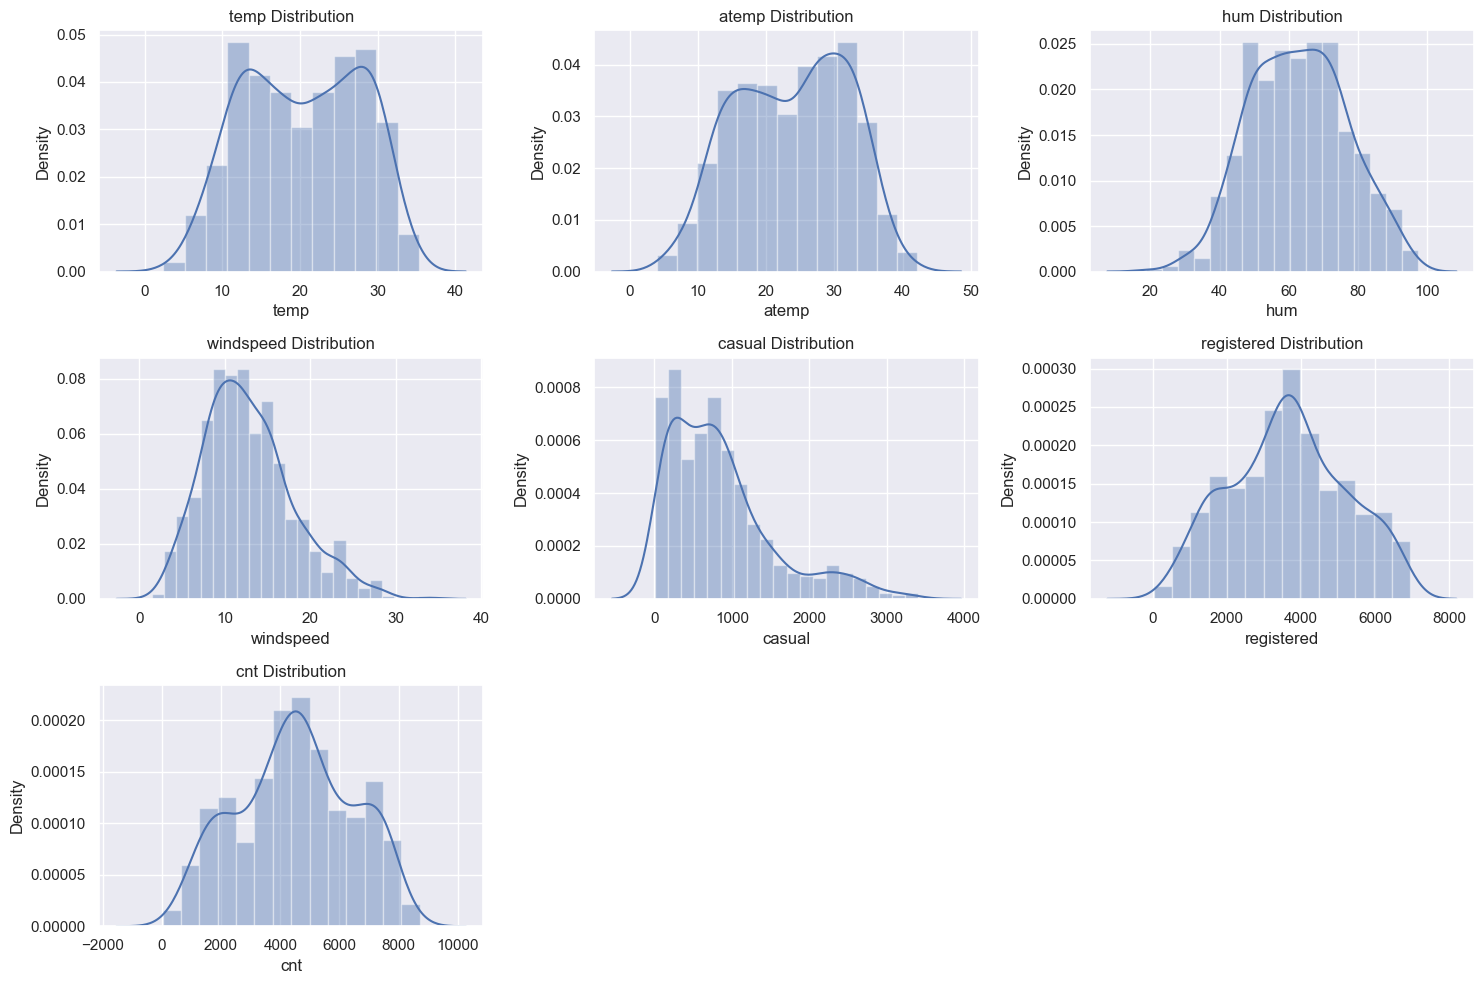

In [49]:
# Plotting bar plot for categorical variables to understand how the data are distributed in each variable

plt.figure(figsize=(15,10))
rows, columns, place = 3, 3, 1
for feature in numerical_cols:
    plt.subplot(rows, columns, place)
    sns.distplot(bike_df[feature])
    plt.title(f'{feature} Distribution')
    place += 1
plt.tight_layout()
plt.show()

**Observation:**
- All the numerical variables are normally distributed except the 'casual' variable. 
- However, it the subset of total ride count 'cnt', hence, no need for further tranformation. Just take as it is.

##  <span style="color:maroon"><b> 5.6. Specific analysis of 'cnt' columns to find why it has least count  '22'</b></span>

- The reason for specific analysis of 'cnt' columns is, the data range is distributed from tens to thousands. i.e., 22 to ~8000.
- If the ride is count nearly 1000s in most of the ranges, why the ride count is less than 50 in some records?. Let us analyse.
- This analyse might give insight for why the ride count is less.
---
- Let us take 1000 as max threshold and fetch the cnt records below 1000

In [50]:
# 'cnt' column

cnt_25per_df = bike_df[bike_df['cnt'] <= 1000]
print(cnt_25per_df.shape)
cnt_25per_df.sort_values(by = 'cnt')

(19, 13)


season    yr mnth weekday       workingday       weathersit  temp  atemp  \
666  winter  2019  Oct     Mon      working_day  Heavy_rain_snow 18.04  21.97   
26   spring  2018  Jan     Thu      working_day     Clear_cloudy  8.00  10.98   
724  spring  2019  Dec     Wed      working_day  Heavy_rain_snow  9.98  11.02   
25   spring  2018  Jan     Wed      working_day  Heavy_rain_snow  8.92  10.18   
64   spring  2018  Mar     Sun  weekend_holiday  Light_rain_snow 15.44  18.31   
68   spring  2018  Mar     Thu      working_day  Heavy_rain_snow 15.95  19.28   
301  winter  2018  Oct     Sat  weekend_holiday  Heavy_rain_snow 10.42  11.40   
17   spring  2018  Jan     Tue      working_day  Light_rain_snow  8.88  11.62   
340  winter  2018  Dec     Wed      working_day  Heavy_rain_snow 16.81  20.01   
358  spring  2018  Dec     Sun  weekend_holiday     Clear_cloudy 11.27  14.00   
105  summer  2018  Apr     Sat  weekend_holiday  Heavy_rain_snow 17.66  21.27   
1    spring  2018  Jan     Sun  weekend_holiday  Light_rain_snow 14.90  17.69   
8    spring  2018  Jan     Sun  weekend_holiday     Clear_cloudy  5.67   5.81   
722  spring  2019  Dec     Mon      working_day  Light_rain_snow  9.48  12.95   
7    spring  2018  Jan     Sat  weekend_holiday  Light_rain_snow  6.76   8.11   
21   spring  2018  Jan     Sat  weekend_holiday     Clear_cloudy  2.42   3.95   
0    spring  2018  Jan     Sat  weekend_holiday  Light_rain_snow 14.11  18.18   
22   spring  2018  Jan     Sun  weekend_holiday     Clear_cloudy  3.96   4.94   
16   spring  2018  Jan     Mon  weekend_holiday  Light_rain_snow  7.21   8.84   

      hum  windspeed  casual  registered   cnt  
666 88.00      24.00       2          20    22  
26  68.75       7.63      15         416   431  
724 82.33      21.21       9         432   441  
25  86.25      19.69      34         472   506  
64  94.83      23.00     114         491   605  
68  62.77      17.55      46         577   623  
301 88.25      23.54      57         570   627  
17  86.17       9.83       9         674   683  
340 97.04      17.83      50         655   705  
358 68.13      10.39     303         451   754  
105 88.83      22.83     121         674   795  
1   69.61      16.65     131         670   801  
8   43.42      24.25      54         768   822  
722 79.13       5.17     174         746   920  
7   53.58      17.88      68         891   959  
21  40.00      11.52      93         888   981  
0   80.58      10.75     331         654   985  
22  43.65      16.52     150         836   986  
16  53.75      13.00     117         883  1000

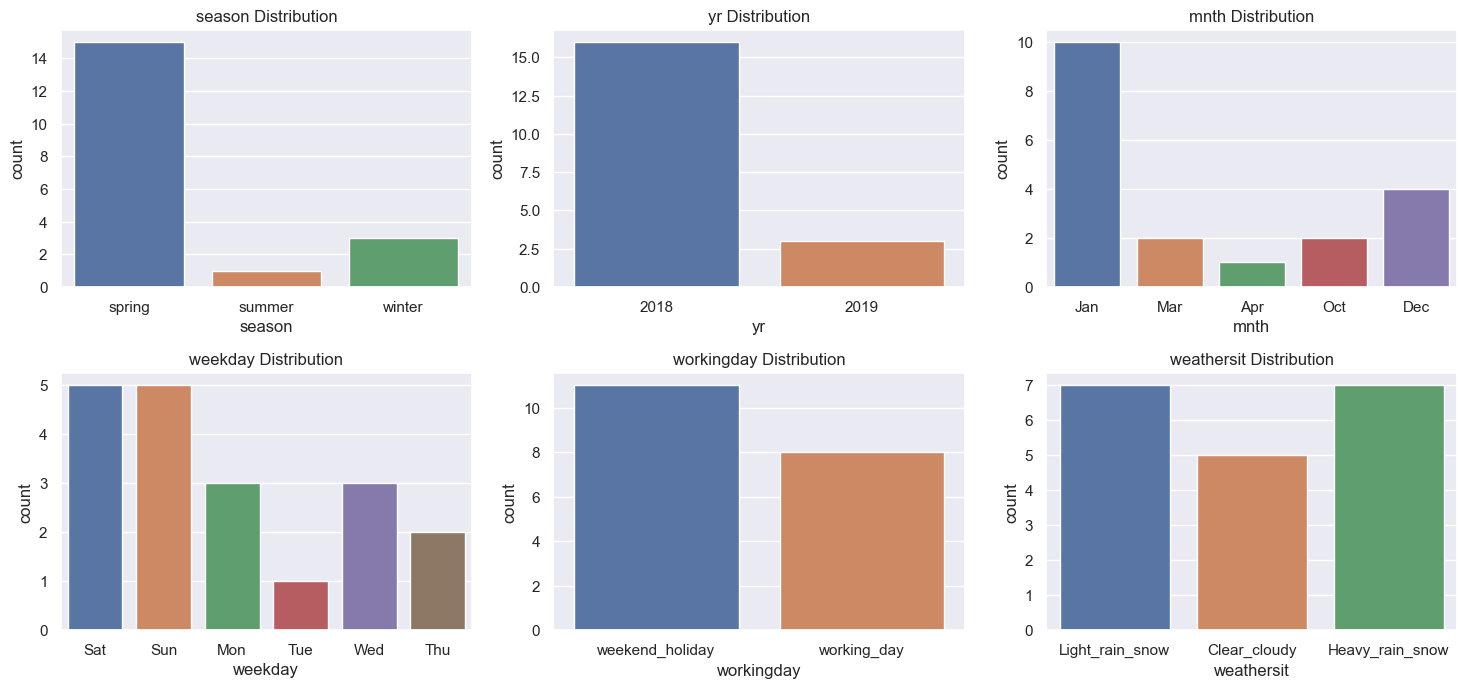

In [51]:
plt.figure(figsize=(15,10))
rows, columns, place = 3, 3, 1
for feature in categorical_cols:
    plt.subplot(rows, columns, place)
    sns.countplot(x=feature, data=cnt_25per_df)
    plt.title(f'{feature} Distribution')
    place += 1
plt.tight_layout()
plt.show()

**Observation:**
- Long bars in specific category of each variable in this chart, indicates the ride counts are very less.
- It again proves the facts derived from previous analysis made in "Bivariate Analysis - Categorical Variables - In-depth analysis".
- Like:
    - Ride counts is less in Heavy rain, less in spring, less in january & december, less in weekends. 
- Focusing on these criteria might help to increase business sales. 

## <span style="color:maroon"><b> 5.7. Bivariate Analysis of Numerical Columns</b></span>

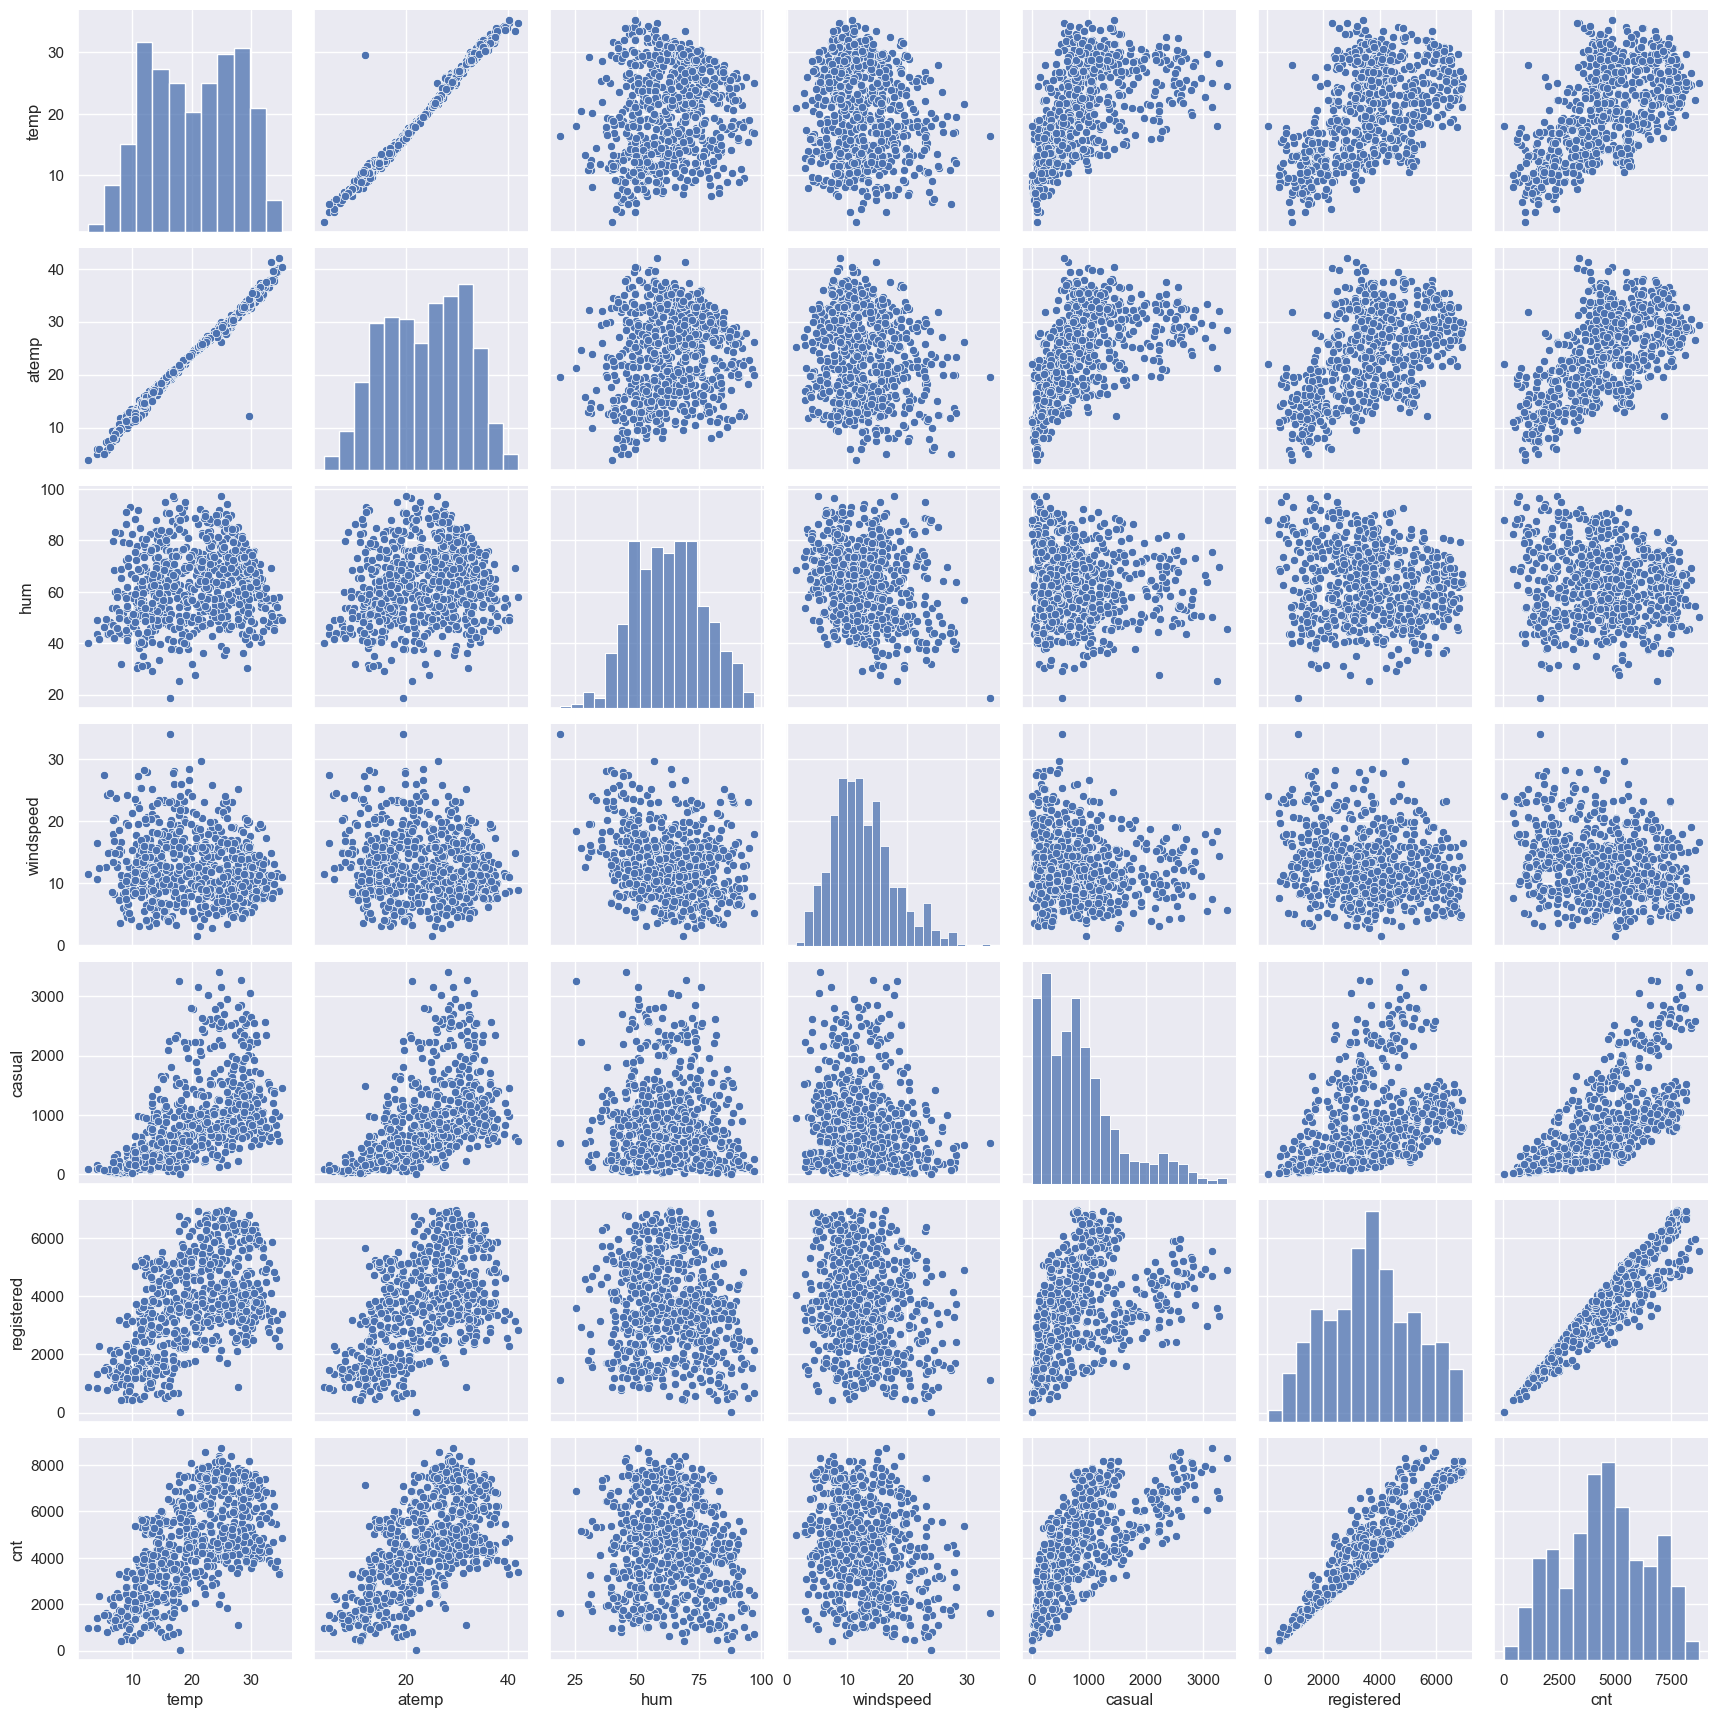

In [52]:
# Let us plot numerical columns in pairplot
sns.pairplot(bike_df[numerical_cols])
plt.show()

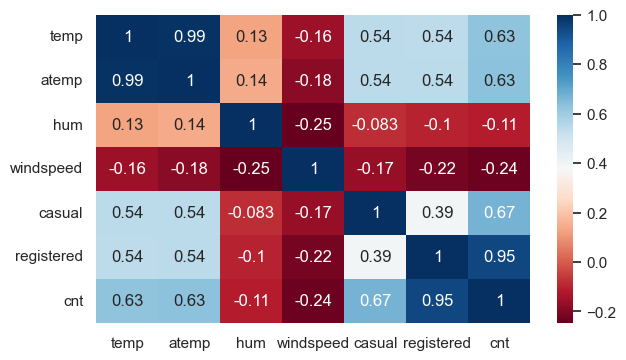

In [53]:
# Let us plot numerical columns in heatmap
plt.figure(figsize=(7,4))
sns.heatmap(bike_df[numerical_cols].corr(), annot=True, cmap="RdBu")
plt.show()

**Observation:**
- In both plot, it is clearly observed that 'temp' and 'atmep' columns have highly correlated with each other. Hence, keep one column in enough for analysis as they both give same insights. Let us drop 'atemp' column
- 'cnt' is moderate negative correlation with 'windspeed'(-0.24) and slight negative correlation with 'humidity' (-0.11)

## <span style="color:maroon"><b> 5.8. Dropping 'atemp' column as the 'temp' and 'atmep' columns are highly correlated with each other</b></span>

In [54]:
print("Columns before dropping atemp column")
bike_df.columns

#dropping atemp column
bike_df.drop('atemp', axis=1, inplace=True)
numerical_cols.remove('atemp')

print("Columns after dropping atemp column")
bike_df.columns

Columns before dropping atemp column
Columns after dropping atemp column


Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

## <span style="color:maroon"><b> 5.9. Analysing 'cnt' with all columns except (instant and dteday)</b></span>

To analyse 'cnt' with all column, we plot heatpa, so we take original dataframe which has no Label encoding for categorical data. 

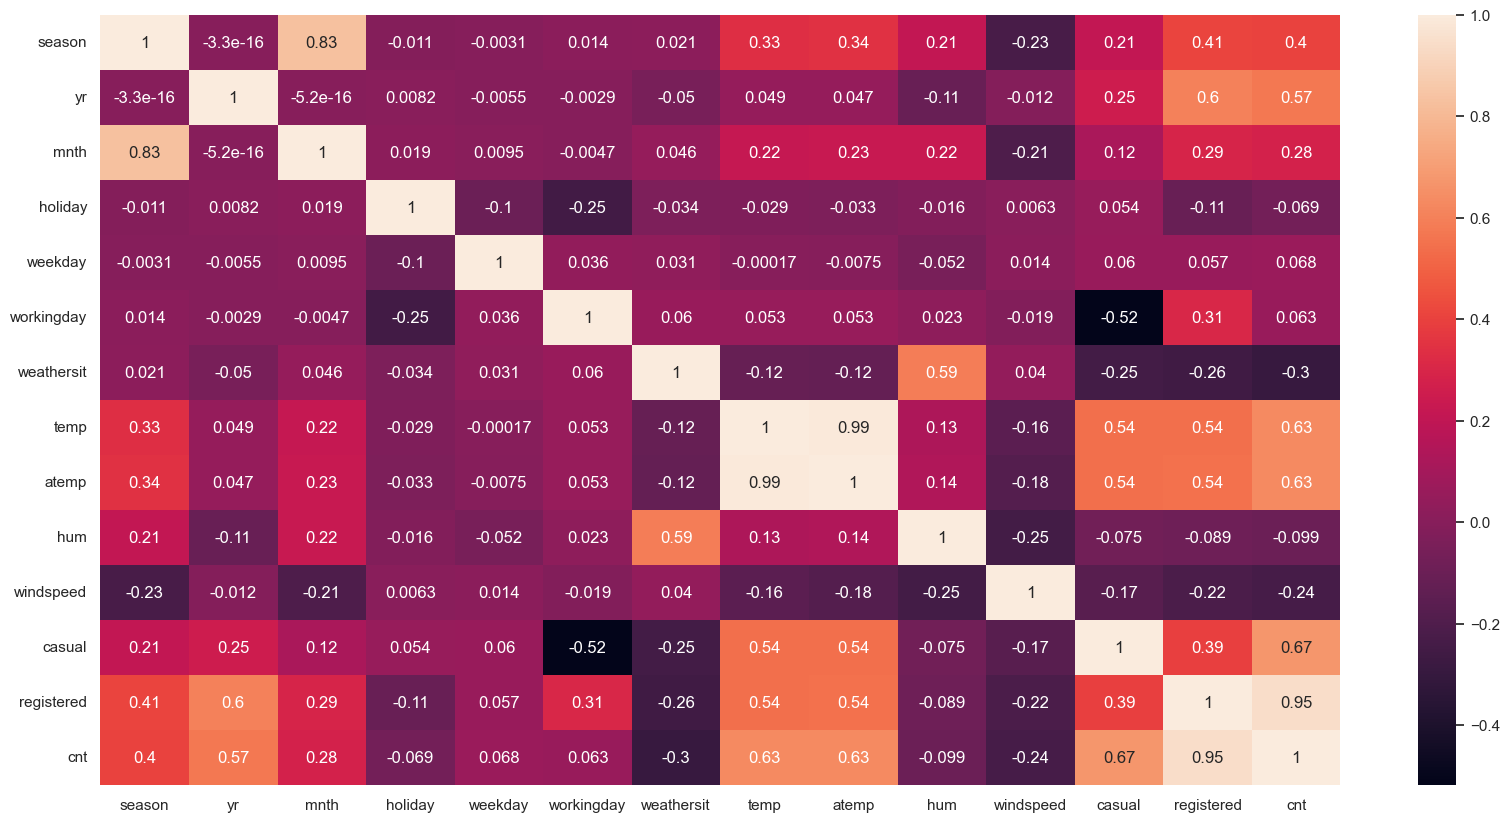

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(bike_main_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].corr(), annot=True)
plt.show()

**Observation:**
- 'cnt' has
    - Negative correlation:
        - high -ve correlation with weathersit(-0.3), windspeed (-0.24)
        - Moderate -ve correlation with hum(-0.099).
    - Positive correlation:
        - High +ve correlation with temp(0.63), yr(0.57), season(0.4) an month(0.28)
        - Moderate +ve correlation with weekday(0.068) and workingday (
---
- This graph proves the facts derived from univariate and bivariate analysis of categorical and numerical variables
- Like,
    - As 'temp' increases, 'cnt' also increases. Indicates, ride count seems higher in 'Fall' & 'Summer' seasons and 'Clear', 'mild cloudy', 'Light rain' weather situations. which we derived during previous analysis.
    - It was found, 'casual' customers are low in working days. Here the map proves that 'casual' has high negative correlation with working day (-0.54)
    - Similary for 'registered' customers, high positive correlation found with (0.31) as it was found that registered customers are more likely to avail bike services during working days. 

## <span style="color:maroon"><b> 5.10. Overall Summary (From Data Understanding to Data Analysis)</b></span>

**Dataset Overview:**
   - The dataset contains, 730 rows and 16 columns
   - No duplicate or missing values found
---
**Data Transformation:**
   - Label Encoding has done for ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] columns in reference with given Data Dictionary. Primarily these columns are 'int', later these were converted to categorical columns
   - Impute mean() of 'hum' column having 0.0 value
   - Though the columns [hum, windspeed and casual] have outliers by the visualization, with domain view, these values are in legitimate range. Hence, not treated.
---
**Columns Dropped:**
   - 'instant' and 'dteday' has no weightage to the analysis
   - 'atemp' column as it give same meaning as 'temp' because it is highly correlated with 'temp' column.
   - 'holiday' column as it data proportion 98% and 2% of No and Yes respectively, has no meaning the whole two years are full of holiday (it is alreays known that covid-19 has full of holidays)
---
**Numerical & Categorical Columns:**
- numerical_cols = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
- categorical_cols = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']
---
**Insights Derived:**
- Bike services increases year-on-year
- Mostly during 'Summer' and 'Fall' seasons, the bike serives are highly availed
- In adding strength to this point, bike services are mostly availed during the months from 'Apr' to 'Oct', in weather situations 'Clear', 'Mild cloudy', 'Light rain/snow'.
- Registered Customers are availing more bike services than casual customers. 
- Bike services are equally availed in all days in the week.
    - However, in distinguished analysis between casual and registered customers, 'registered' customers are more likely to avail services during weekdays, whereas,  casual customers are availed more during weekends.
    - From this point, we shall consider that the registered might be the working professionals availing bike services more for office travel. Also, they can be regular customers. Initiating offers might help to retain them for long.
---
<center><span style="color:marron"><b>Overall Assumptions:</b></span></center><br>
<span style="color:maroon"><b>
1. In overall, 'cnt' - ride count is majorly depend on atmospheric conditions such as weathersit, season. If the weather is clear and mild, customers are more likely to avail bike services. <br>
2. Followed by working days. Registered customers are more for weekdays and casual are more for weekends. Taking initiative to increase casual customers to avail services will help management to increase the business productivity. At the same time, initiating offers for 'registered' customers to retain them for long</b></span><br>

# <span style="color:teal"><b>6. DATA PREPARATION</b></span>

- In this section, we prepare data to build model
- So far, we analysed the dataset and derived meaningful facts that will help to increases the ride count.
- From this section, we will build Model.

In [56]:
print(categorical_cols, numerical_cols)

['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'] ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


## <span style="color:maroon"><b>6.1 Create new dataframe for model building</b></span>

- To create new dataframe for model building, we take finalized columns after dropping some of them. The list of columns is printed above.
- Here we shall ignore'casual' and 'registered' columns, as they are subset of 'cnt'-target variable.

In [57]:
new_bike_df = bike_df[['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit','temp', 'hum', 'windspeed', 'cnt']]
new_bike_df.head(3)

season    yr mnth weekday       workingday       weathersit  temp   hum  \
0  spring  2018  Jan     Sat  weekend_holiday  Light_rain_snow 14.11 80.58   
1  spring  2018  Jan     Sun  weekend_holiday  Light_rain_snow 14.90 69.61   
2  spring  2018  Jan     Mon      working_day     Clear_cloudy  8.05 43.73   

   windspeed   cnt  
0      10.75   985  
1      16.65   801  
2      16.64  1349

In [58]:
print("Shape of main dataset", bike_main_df.shape)
print("Shape of new dataset", new_bike_df.shape)

Shape of main dataset (730, 16)
Shape of new dataset (730, 10)


## <span style="color:maroon"><b>6.2 Data Transformation using One Hot Encoding Technique (categorical variables)</b></span>

- In this section, we create new features applying One Hot Encoding Technique to categorical variables.
- The reason to do this is to filter the categories which are more significant for the outcome

In [59]:
# categorical_cols = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

new_bike_df = pd.get_dummies(data=new_bike_df, columns=categorical_cols,  drop_first=True, dtype=int)
# new_bike_df.head()

In [60]:
new_bike_df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_working_day',
       'weathersit_Heavy_rain_snow', 'weathersit_Light_rain_snow'],
      dtype='object')

In [61]:
new_bike_df.shape

(730, 28)

In [62]:
# Shifting 'cnt' column to the end for better readablilty
new_bike_df = new_bike_df[['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_working_day',
       'weathersit_Heavy_rain_snow', 'weathersit_Light_rain_snow','cnt']]
new_bike_df.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_working_day',
       'weathersit_Heavy_rain_snow', 'weathersit_Light_rain_snow', 'cnt'],
      dtype='object')

In [63]:
# Ensure all columns are numercial variables.
new_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        730 non-null    float64
 1   hum                         730 non-null    float64
 2   windspeed                   730 non-null    float64
 3   season_spring               730 non-null    int32  
 4   season_summer               730 non-null    int32  
 5   season_winter               730 non-null    int32  
 6   yr_2019                     730 non-null    int32  
 7   mnth_Aug                    730 non-null    int32  
 8   mnth_Dec                    730 non-null    int32  
 9   mnth_Feb                    730 non-null    int32  
 10  mnth_Jan                    730 non-null    int32  
 11  mnth_Jul                    730 non-null    int32  
 12  mnth_Jun                    730 non-null    int32  
 13  mnth_Mar                    730 non

## <span style="color:maroon"><b>6.3 Understanding the corr() between Independent and Target variable after One Hot encoding</b></span>

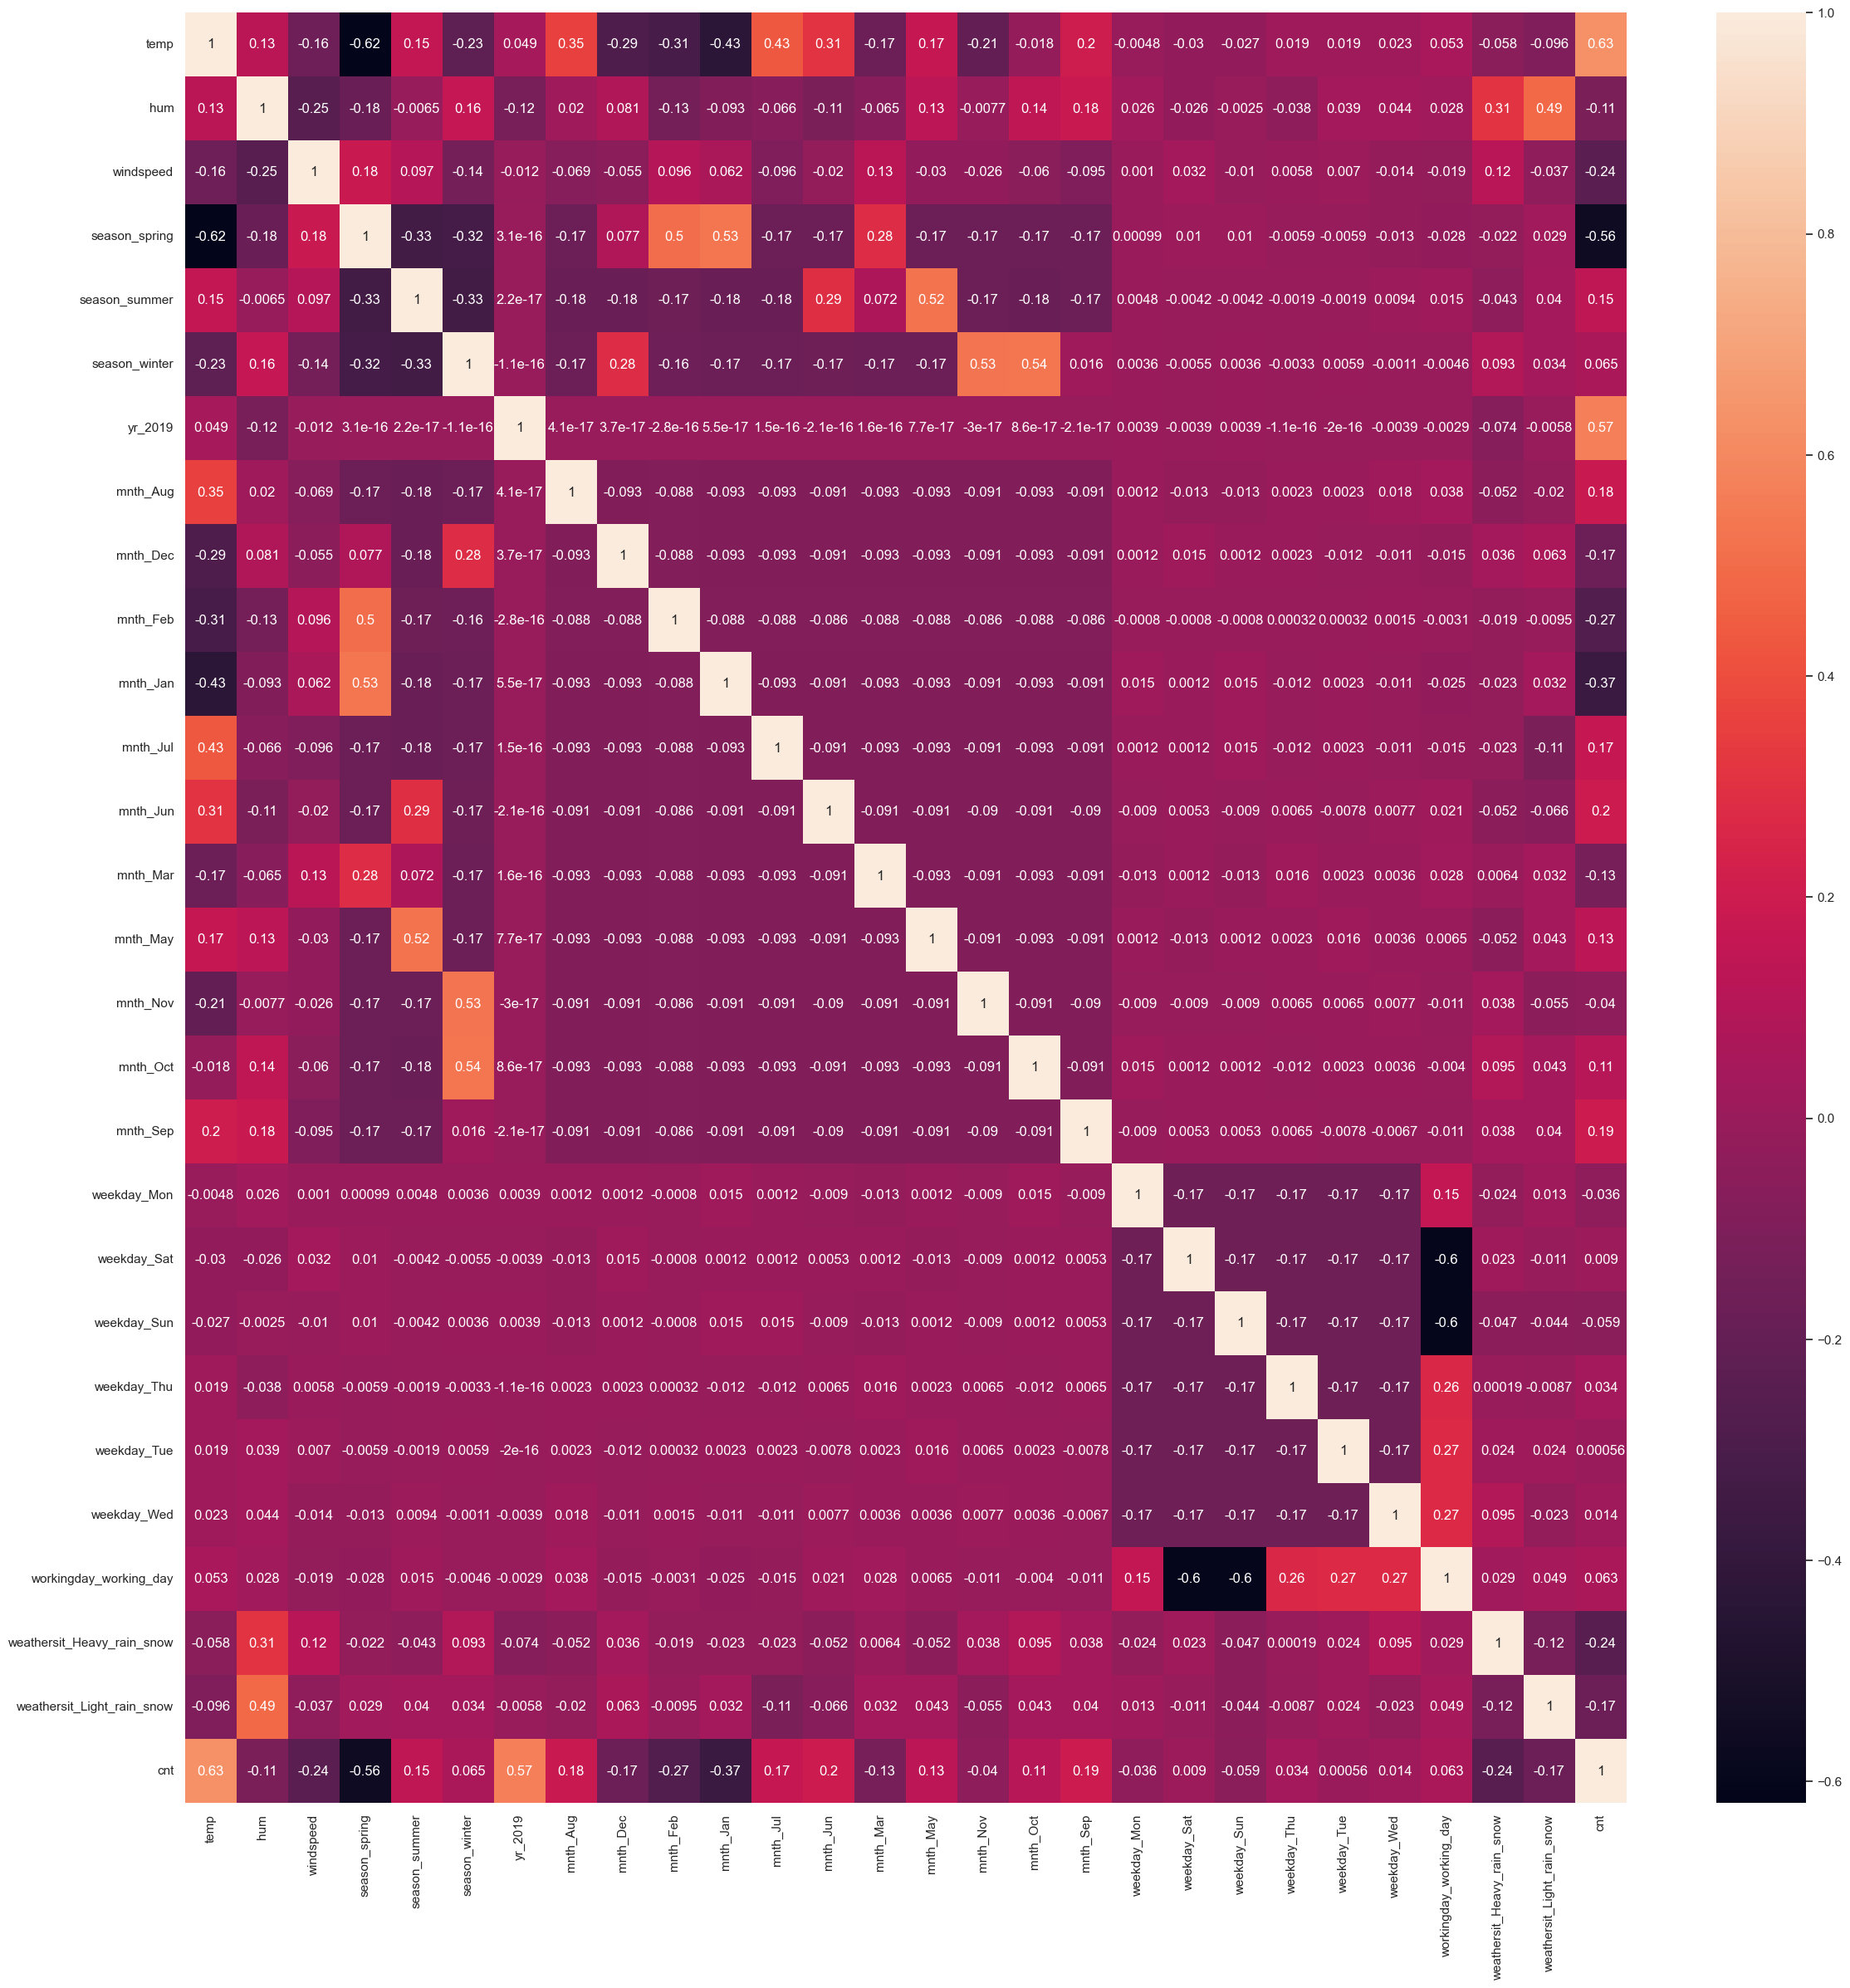

In [64]:
plt.figure(figsize=(28,28))
sns.heatmap(new_bike_df.corr(), annot=True)
plt.show()

**Observation:**
- 'cnt' Negatively correlated with:
    - 'season_spring' = -0.56 (categorical)
    - 'month jan' = -0.37 (categorical)
    - 'month_feb' = -0.27 (categorical)
    - 'weathersit_heavy_rain_snow' = -0.24 (categorical)
    - 'weather_Light_rain_snow' = -0.17 (categorical)
    - 'windspeed' = -0.24 (Numerical)
    - 'humidity' = -0.11 (Numerical)
    
- 'cnt' postively correlated with:
    - 'temp' = 0.63 (Numerical)
    - 'yr_2019' = 0.57 (categorical)
    - 'month_jun' = 0.2 (categorical)
    - 'month_sep' = 0.19 (categorical)
    - 'month_jul' = 0.17 (categorical)
    - 'month_may = 0.13 (categorical)
---  
- When 'temp' temperature increases, bike ride is also increases. 
- When 'windspeed', 'humidity' increases, bike ride is decreases. It means, bike ride is less during winter and heavy rain 
seasons
- The way to interpret categorical variables corr() is little different, 
    - -ve correlated categorical variables indicates, the bike ride are more like less in that particular variable. Like, bike ride is less in month Jan, Feb
    - For +ve correlated categorical variables, just opposite to the above point. Eg., Bike ride is higher in months Jun, Sep.
    
---
-Let us build model to cross verfiy this manual interpretation of variables.

## <span style="color:maroon"><b>6.4 Splitting data into Training and Test Split </b></span>

In [65]:
# Split the dataset into 70-30 proportion of Train and Test dataset
df_train, df_test = train_test_split(new_bike_df, train_size=0.7, random_state=100 )
print(new_bike_df.shape, df_train.shape, df_test.shape)

(730, 28) (510, 28) (220, 28)


## <span style="color:maroon"><b>6.5 Scalling Training and Test dataset  </b></span>

- The numercial cols ['temp', 'hum', 'windspeed', 'cnt'] in dataset have different units when compared with other columns which have 0 & 1. For better model building, we shall scale these four columns using normalization technique (MinMax scalling) to uniform the units of all columns

In [66]:
# Creating list of numerical columns to be scalled
num_cols_new = ['temp', 'hum', 'windspeed','cnt']

# Create Instance
scaler = MinMaxScaler()

# Scalling Training Dataset
df_train[num_cols_new] = scaler.fit_transform(df_train[num_cols_new]) # When scalling use fit_transform for Training set

# Scalling Test Dataset
df_test[num_cols_new] = scaler.transform(df_test[num_cols_new]) # When scalling use transform for Test set

df_train.describe()

temp    hum  windspeed  season_spring  season_summer  season_winter  \
count 510.00 510.00     510.00         510.00         510.00         510.00   
mean    0.54   0.57       0.32           0.24           0.25           0.25   
std     0.23   0.18       0.17           0.43           0.43           0.43   
min     0.00   0.00       0.00           0.00           0.00           0.00   
25%     0.34   0.43       0.20           0.00           0.00           0.00   
50%     0.54   0.57       0.30           0.00           0.00           0.00   
75%     0.74   0.70       0.41           0.00           0.00           0.00   
max     1.00   1.00       1.00           1.00           1.00           1.00   

       yr_2019  mnth_Aug  mnth_Dec  mnth_Feb  ...  weekday_Mon  weekday_Sat  \
count   510.00    510.00    510.00    510.00  ...       510.00       510.00   
mean      0.51      0.10      0.08      0.07  ...         0.15         0.15   
std       0.50      0.29      0.28      0.25  ...         0.36         0.36   
min       0.00      0.00      0.00      0.00  ...         0.00         0.00   
25%       0.00      0.00      0.00      0.00  ...         0.00         0.00   
50%       1.00      0.00      0.00      0.00  ...         0.00         0.00   
75%       1.00      0.00      0.00      0.00  ...         0.00         0.00   
max       1.00      1.00      1.00      1.00  ...         1.00         1.00   

       weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
count       510.00       510.00       510.00       510.00   
mean          0.14         0.13         0.13         0.16   
std           0.35         0.34         0.34         0.37   
min           0.00         0.00         0.00         0.00   
25%           0.00         0.00         0.00         0.00   
50%           0.00         0.00         0.00         0.00   
75%           0.00         0.00         0.00         0.00   
max           1.00         1.00         1.00         1.00   

       workingday_working_day  weathersit_Heavy_rain_snow  \
count                  510.00                      510.00   
mean                     0.68                        0.03   
std                      0.47                        0.17   
min                      0.00                        0.00   
25%                      0.00                        0.00   
50%                      1.00                        0.00   
75%                      1.00                        0.00   
max                      1.00                        1.00   

       weathersit_Light_rain_snow    cnt  
count                      510.00 510.00  
mean                         0.35   0.51  
std                          0.48   0.22  
min                          0.00   0.00  
25%                          0.00   0.36  
50%                          0.00   0.52  
75%                          1.00   0.68  
max                          1.00   1.00  

[8 rows x 28 columns]

- Now we can see the min and max values of these columns are 0 & 1. Means the data scalled

## <span style="color:maroon"><b>6.6 Splitting X_train, y_train, X_test, y_test</b></span>

In [67]:
# X = Independent Variable, y = Dependent variable (Target)

# Splitting 70% of Training dataset
X_train = df_train.drop('cnt', axis=1)  
y_train = df_train['cnt']

# Splitting 30% of Test data
X_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(510, 27) (220, 27) (510,) (220,)


- Now the training and test dataset of Independent and Dependent variable is ready.

# <span style="color:teal"><b>7. MODEL BUILD & TRAINING</b></span>

 - From here we build model to find variables which can create demand for bike rides.
 - Before training all features in model, we need to find whether all features are significant or anything to filter out. Here, We have 27 variables.
 - Checking each variables one by one to find its significance is hectic.
 - Hence, we use RFE method to rank the variables based on its importance to the target variable, then pick the top ranked variables which are more significance to train the model

## <span style="color:maroon"><b>7.1. RFE (Recursive Feature Elimination)</b></span>

In [69]:
lr = LinearRegression() # Creating instance
lr.fit(X_train, y_train) # Fit X_train and y_train in the model

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [70]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

Predictor  Select Status  Ranking
0                         temp           True        1
24      workingday_working_day           True        1
20                 weekday_Sun           True        1
19                 weekday_Sat           True        1
17                    mnth_Sep           True        1
25  weathersit_Heavy_rain_snow           True        1
11                    mnth_Jul           True        1
10                    mnth_Jan           True        1
26  weathersit_Light_rain_snow           True        1
4                season_summer           True        1
1                          hum           True        1
6                      yr_2019           True        1
2                    windspeed           True        1
5                season_winter           True        1
3                season_spring           True        1
15                    mnth_Nov          False        2
8                     mnth_Dec          False        3
9                     mnth_Feb          False        4
14                    mnth_May          False        5
7                     mnth_Aug          False        6
18                 weekday_Mon          False        7
22                 weekday_Tue          False        8
21                 weekday_Thu          False        9
23                 weekday_Wed          False       10
16                    mnth_Oct          False       11
12                    mnth_Jun          False       12
13                    mnth_Mar          False       13

In [71]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep',
       'weekday_Sat', 'weekday_Sun', 'workingday_working_day',
       'weathersit_Heavy_rain_snow', 'weathersit_Light_rain_snow'],
      dtype='object')

In [72]:
# To know which colomns are rejected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

- RFE is successfully predicted top 15 predictors which will impact our outcome
- However, we cannot completely rely on this result. We will build stat model by reducing features one by one which is not satisfy our requirement

## <span style="color:maroon"><b>7.2. Building model using statsmodel + Feature Reduction</b></span>

- In this section, we use STATSMODEL and VIF to filter the significant features. The steps are given below:
     - 1. First we apply all RFE supported features to stats and find which features has high p-value. Followed by, apply the same columns to VIF to find which column has high VIF.
     - 2. IF a column has high p-value and high VIF, we going to remove that column. Else, we remove the column having high p-value and iterate the process (Build Model 2)
     - 3. This iteration will continue until we attain stats resulted with all features have low p-value and VIF < 5
 - Let's start iteration

### <span style="background-color:navy;color:white"><b> 7.2.1. Model 1 - With all rfe.support_ features</b></span>

In [73]:
def fetch_vif_df(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [74]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe) #all the columns in X_train + a constant column
lr = sm.OLS(y_train, X_train_sm) #training the model
lr_model = lr.fit() #fitting the training data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.91e-191
Time:                        21:24:08   Log-Likelihood:                 519.72
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1655      0.040      4.134      0.000       0.087       0.244
temp                           0.5139      0.035     14.848      0.000       0.446       0.582
hum                           -0.1350      0.032     -4.207      0.000      -0.198      -0.072
windspeed                     -0.1885      0.026     -7.356      0.000      -0.239      -0.138
season_spring                 -0.0483      0.021     -2.330      0.020      -0.089      -0.008
season_summer                  0.0515      0.015      3.468      0.001       0.022       0.081
season_winter                  0.0945      0.017      5.456      0.000       0.060       0.129
yr_2019                        0.2299      0.008     28.665      0.000       0.214       0.246
mnth_Jan                      -0.0352      0.017     -2.028      0.043      -0.069      -0.001
mnth_Jul                      -0.0535      0.018     -2.961      0.003      -0.089      -0.018
mnth_Sep                       0.0816      0.016      4.958      0.000       0.049       0.114
weekday_Sat                    0.1113      0.027      4.164      0.000       0.059       0.164
weekday_Sun                    0.0583      0.027      2.169      0.031       0.005       0.111
workingday_working_day         0.1016      0.025      4.015      0.000       0.052       0.151
weathersit_Heavy_rain_snow    -0.2370      0.027     -8.749      0.000      -0.290      -0.184
weathersit_Light_rain_snow    -0.0545      0.011     -5.144      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.745   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.475
Skew:                          -0.684   Prob(JB):                     1.42e-35
Kurtosis:                       5.383   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
fetch_vif_df(X_train_rfe)

Features   VIF
0                          hum 21.72
1                         temp 18.64
2       workingday_working_day 17.43
3                    windspeed  5.06
4                season_spring  4.81
5                  weekday_Sat  4.70
6                  weekday_Sun  4.53
7                season_winter  3.50
8                season_summer  2.96
9   weathersit_Light_rain_snow  2.48
10                     yr_2019  2.11
11                    mnth_Jan  1.67
12                    mnth_Jul  1.61
13                    mnth_Sep  1.37
14  weathersit_Heavy_rain_snow  1.37

**Observation:**
- 'month_jan' has high p-value = 0.043 (>0.05). Hence, we will drop this column and itererate further.

### <span style="background-color:navy;color:white"><b> 7.2.2. Model 2 by dropping 'mnth_jan' </b></span>

In [76]:
col = col.drop(['mnth_Jan'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe) #all the columns in X_train + a constant column
lr = sm.OLS(y_train, X_train_sm) #training the model
lr_model = lr.fit() #fitting the training data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        21:24:09   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1515      0.040      3.830      0.000       0.074       0.229
temp                           0.5323      0.034     15.887      0.000       0.466       0.598
hum                           -0.1386      0.032     -4.312      0.000      -0.202      -0.075
windspeed                     -0.1829      0.026     -7.158      0.000      -0.233      -0.133
season_spring                 -0.0530      0.021     -2.565      0.011      -0.094      -0.012
season_summer                  0.0545      0.015      3.679      0.000       0.025       0.084
season_winter                  0.1005      0.017      5.870      0.000       0.067       0.134
yr_2019                        0.2292      0.008     28.511      0.000       0.213       0.245
mnth_Jul                      -0.0552      0.018     -3.050      0.002      -0.091      -0.020
mnth_Sep                       0.0822      0.017      4.979      0.000       0.050       0.115
weekday_Sat                    0.1117      0.027      4.166      0.000       0.059       0.164
weekday_Sun                    0.0592      0.027      2.196      0.029       0.006       0.112
workingday_working_day         0.1022      0.025      4.028      0.000       0.052       0.152
weathersit_Heavy_rain_snow    -0.2344      0.027     -8.636      0.000      -0.288      -0.181
weathersit_Light_rain_snow    -0.0546      0.011     -5.136      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       65.246   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.199
Skew:                          -0.669   Prob(JB):                     7.32e-35
Kurtosis:                       5.368   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
fetch_vif_df(X_train_rfe)

Features   VIF
0                          hum 21.46
1                         temp 17.87
2       workingday_working_day 17.18
3                    windspeed  5.05
4                  weekday_Sat  4.63
5                season_spring  4.52
6                  weekday_Sun  4.48
7                season_winter  3.47
8                season_summer  2.96
9   weathersit_Light_rain_snow  2.48
10                     yr_2019  2.10
11                    mnth_Jul  1.60
12                    mnth_Sep  1.37
13  weathersit_Heavy_rain_snow  1.37

- 'weekday_Sun' has high p-value 0.029 (>0.05). Hence, we will further proceed by drop this column

### <span style="background-color:navy;color:white"><b> 7.2.3. Model 3 by dropping 'weekday_Sun'</b></span>

In [78]:
col = col.drop(['weekday_Sun'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe) #all the columns in X_train + a constant column
lr = sm.OLS(y_train, X_train_sm) #training the model
lr_model = lr.fit() #fitting the training data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.56e-191
Time:                        21:24:10   Log-Likelihood:                 515.14
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2014      0.032      6.203      0.000       0.138       0.265
temp                           0.5323      0.034     15.826      0.000       0.466       0.598
hum                           -0.1371      0.032     -4.250      0.000      -0.200      -0.074
windspeed                     -0.1834      0.026     -7.152      0.000      -0.234      -0.133
season_spring                 -0.0541      0.021     -2.609      0.009      -0.095      -0.013
season_summer                  0.0548      0.015      3.687      0.000       0.026       0.084
season_winter                  0.0995      0.017      5.792      0.000       0.066       0.133
yr_2019                        0.2294      0.008     28.433      0.000       0.214       0.245
mnth_Jul                      -0.0541      0.018     -2.976      0.003      -0.090      -0.018
mnth_Sep                       0.0801      0.017      4.842      0.000       0.048       0.113
weekday_Sat                    0.0614      0.014      4.381      0.000       0.034       0.089
workingday_working_day         0.0518      0.011      4.764      0.000       0.030       0.073
weathersit_Heavy_rain_snow    -0.2338      0.027     -8.579      0.000      -0.287      -0.180
weathersit_Light_rain_snow    -0.0543      0.011     -5.095      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       71.973   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.154
Skew:                          -0.714   Prob(JB):                     1.03e-40
Kurtosis:                       5.574   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
fetch_vif_df(X_train_rfe)

Features   VIF
0                          hum 20.16
1                         temp 14.56
2                    windspeed  4.83
3       workingday_working_day  4.67
4                season_spring  3.61
5                season_winter  2.98
6                season_summer  2.67
7   weathersit_Light_rain_snow  2.47
8                      yr_2019  2.09
9                  weekday_Sat  1.83
10                    mnth_Jul  1.59
11                    mnth_Sep  1.37
12  weathersit_Heavy_rain_snow  1.36

- Now the p-values are in legitimate range. In VIF, 'hum' has top score. Let us proceed further by dropping 'hum' column

### <span style="background-color:navy;color:white"><b> 7.2.4. Model 4 by dropping 'hum' </b></span>

In [80]:
col = col.drop(['season_spring'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe) #all the columns in X_train + a constant column
lr = sm.OLS(y_train, X_train_sm) #training the model
lr_model = lr.fit() #fitting the training data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.96e-191
Time:                        21:24:10   Log-Likelihood:                 511.66
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     497   BIC:                            -942.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1440      0.024      5.996      0.000       0.097       0.191
temp                           0.5980      0.022     26.667      0.000       0.554       0.642
hum                           -0.1488      0.032     -4.634      0.000      -0.212      -0.086
windspeed                     -0.1911      0.026     -7.457      0.000      -0.241      -0.141
season_summer                  0.0821      0.011      7.727      0.000       0.061       0.103
season_winter                  0.1352      0.010     12.933      0.000       0.115       0.156
yr_2019                        0.2279      0.008     28.156      0.000       0.212       0.244
mnth_Jul                      -0.0451      0.018     -2.516      0.012      -0.080      -0.010
mnth_Sep                       0.0925      0.016      5.801      0.000       0.061       0.124
weekday_Sat                    0.0618      0.014      4.383      0.000       0.034       0.090
workingday_working_day         0.0524      0.011      4.786      0.000       0.031       0.074
weathersit_Heavy_rain_snow    -0.2273      0.027     -8.327      0.000      -0.281      -0.174
weathersit_Light_rain_snow    -0.0514      0.011     -4.819      0.000      -0.072      -0.030
==============================================================================
Omnibus:                       66.170   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.085
Skew:                          -0.696   Prob(JB):                     1.56e-33
Kurtosis:                       5.275   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
fetch_vif_df(X_train_rfe)

Features   VIF
0                          hum 13.32
1                         temp 10.02
2       workingday_working_day  4.37
3                    windspeed  3.53
4   weathersit_Light_rain_snow  2.29
5                      yr_2019  2.02
6                season_summer  1.76
7                  weekday_Sat  1.74
8                season_winter  1.67
9                     mnth_Jul  1.55
10                    mnth_Sep  1.29
11  weathersit_Heavy_rain_snow  1.25

- 'mnth_Jul' has 0.012 > 0.05. Going to drop and proceed further

### <span style="background-color:navy;color:white"><b> 7.2.5. Model 5 by dropping 'mnth_Jul' </b></span>

In [82]:
col = col.drop(['mnth_Jul'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe) #all the columns in X_train + a constant column
lr = sm.OLS(y_train, X_train_sm) #training the model
lr_model = lr.fit() #fitting the training data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          4.29e-191
Time:                        21:24:10   Log-Likelihood:                 508.43
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1441      0.024      5.970      0.000       0.097       0.192
temp                           0.5721      0.020     28.549      0.000       0.533       0.612
hum                           -0.1408      0.032     -4.381      0.000      -0.204      -0.078
windspeed                     -0.1883      0.026     -7.315      0.000      -0.239      -0.138
season_summer                  0.0907      0.010      8.960      0.000       0.071       0.111
season_winter                  0.1394      0.010     13.432      0.000       0.119       0.160
yr_2019                        0.2289      0.008     28.153      0.000       0.213       0.245
mnth_Sep                       0.1026      0.016      6.617      0.000       0.072       0.133
weekday_Sat                    0.0623      0.014      4.391      0.000       0.034       0.090
workingday_working_day         0.0533      0.011      4.847      0.000       0.032       0.075
weathersit_Heavy_rain_snow    -0.2317      0.027     -8.463      0.000      -0.286      -0.178
weathersit_Light_rain_snow    -0.0519      0.011     -4.842      0.000      -0.073      -0.031
==============================================================================
Omnibus:                       73.473   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.909
Skew:                          -0.764   Prob(JB):                     2.10e-37
Kurtosis:                       5.369   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
fetch_vif_df(X_train_rfe)

Features   VIF
0                          hum 13.09
1                         temp  7.76
2       workingday_working_day  4.36
3                    windspeed  3.52
4   weathersit_Light_rain_snow  2.29
5                      yr_2019  2.02
6                  weekday_Sat  1.74
7                season_winter  1.63
8                season_summer  1.58
9   weathersit_Heavy_rain_snow  1.24
10                    mnth_Sep  1.20

- Now p-value of all the predictors are 0.0
- Now we going to drop 'hum' which have high VIF value 13.09

### <span style="background-color:navy;color:white"><b> 7.2.6. Model 6  - dropping 'hum'</b></span>

In [84]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe) #all the columns in X_train + a constant column
lr = sm.OLS(y_train, X_train_sm) #training the model
lr_model = lr.fit() #fitting the training data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.13e-188
Time:                        21:24:19   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0750      0.019      4.031      0.000       0.038       0.112
temp                           0.5499      0.020     27.861      0.000       0.511       0.589
windspeed                     -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_summer                  0.0886      0.010      8.608      0.000       0.068       0.109
season_winter                  0.1307      0.010     12.600      0.000       0.110       0.151
yr_2019                        0.2331      0.008     28.370      0.000       0.217       0.249
mnth_Sep                       0.0974      0.016      6.184      0.000       0.066       0.128
weekday_Sat                    0.0675      0.014      4.693      0.000       0.039       0.096
workingday_working_day         0.0561      0.011      5.024      0.000       0.034       0.078
weathersit_Heavy_rain_snow    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
weathersit_Light_rain_snow    -0.0800      0.009     -9.143      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
final_vif = fetch_vif_df(X_train_rfe)
final_vif

Features  VIF
0                        temp 4.76
1      workingday_working_day 4.04
2                   windspeed 3.44
3                     yr_2019 2.02
4                 weekday_Sat 1.69
5               season_summer 1.57
6  weathersit_Light_rain_snow 1.53
7               season_winter 1.40
8                    mnth_Sep 1.20
9  weathersit_Heavy_rain_snow 1.08

- Now the p-values and VIF are under the legitimate range of values.

# <span style="color:teal"><b>8. Predicting Test Data using Developed Model  </b></span>

- We dropped certain columns during Model building. Hence, we going to create new Training and Test dataset with finalized features in model building and apply for prediction and evaluation.

<h3>Step 1: Recreating X_train and X_test dataset with finalised columns after model training</h3>

In [86]:
# Training Dataset
X_train_new = X_train[X_train_rfe.columns]
X_train_new = sm.add_constant(X_train_new)

#Test Dataset
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

# The reason to add "add_constant" is, (lr_model) was trained along with this constant value. 
# Hence, we need add this value to match the dataset of the model

<h3>Step 2: Model Prediction</h3>

In [87]:
# Model Prediction
X_train_pred = lr_model.predict(X_train_new)
y_test_pred = lr_model.predict(X_test_new)

<h3>Step 3: Model Evaluation (r2_score, adjusted r2)</h3>

In [88]:
# Calculating r2 score
r2_score_train = r2_score(y_train, X_train_pred) # for training set
r2_score_test = r2_score(y_test, y_test_pred) # for test set

# Calculating adjusted r2 score
adjusted_r2_train = round(1-(1-r2_score_train)*(X_train_new.shape[0]-1)/(X_train_new.shape[0]-X_train_new.shape[1]-1),4) # for training set
adjusted_r2_test = round(1-(1-r2_score_test)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),4) # for test set


print("Training Dataset R^2          -->", r2_score_train)
print("Test Dataset R^2              -->", r2_score_test)
print("Training Dataset Adjusted R^2 -->", adjusted_r2_train)
print("Test Dataset Adjusted R^2     -->", adjusted_r2_test)

Training Dataset R^2          --> 0.8352749595695672
Test Dataset R^2              --> 0.7961390438459766
Training Dataset Adjusted R^2 --> 0.8316
Test Dataset Adjusted R^2     --> 0.7854


**Observation:**
- The obtained R Square and Adjusted R between Training and Test dataset is almost closer. 
- It indicates the model has been trained well

# <span style="color:teal"><b>9. Proof of the Linear Regression assumptions</b></span>

## <span style="color:maroon"><b>9.1. Assumption of Normally Distributed Errors </b></span>

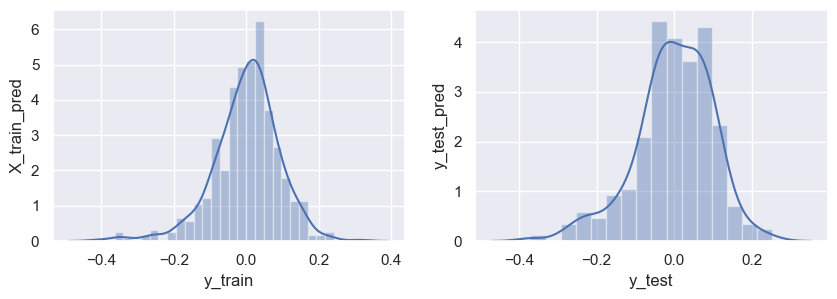

In [89]:
plt.figure(figsize=(10,3))

# Plotting y-train and x-train-predict to visualize the error distribution
plt.subplot(1,2,1)
residuals = y_train - X_train_pred
sns.distplot(residuals)
plt.xlabel("y_train")
plt.ylabel("X_train_pred")

# Plotting y-test and y-test-predict to visualize the error distribution
plt.subplot(1,2,2)
residuals = y_test - y_test_pred
sns.distplot(residuals)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")

plt.show()

- It is observed that the residuals in training and test predictions are normally distributed. It is good sign

## <span style="color:maroon"><b>9.2. Assumption of Homoscedasticity of the Predicted Model</b></span>

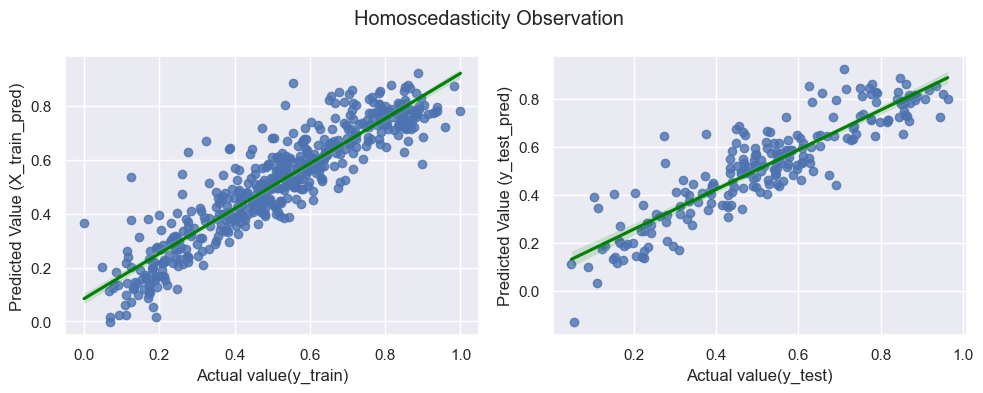

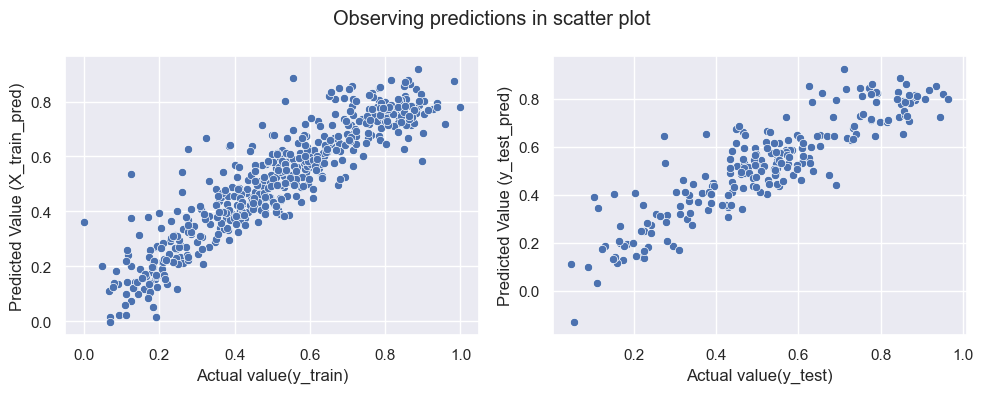

In [90]:
plt.figure(figsize=(10,4))

# -------------------------Plotting regplot for Homoscedasticity--------------------------------------
# Plotting y-train and x-train-predict to visualize homoskedasticity of the values.
plt.subplot(1,2,1)
sns.regplot(x=y_train, y=X_train_pred, line_kws={"color": "green"})
plt.xlabel("Actual value(y_train)")
plt.ylabel("Predicted Value (X_train_pred)")

# Plotting y-test and y-test-predict to visualize the error distribution
plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "green"})
plt.xlabel("Actual value(y_test)")
plt.ylabel("Predicted Value (y_test_pred)")

plt.suptitle("Homoscedasticity Observation ")
plt.tight_layout()
plt.show()



# ------------------------Plotting scatterplot for distribution observation--------------------------------------
# Plotting y-train and x-train-predict
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(x=y_train, y=X_train_pred)
plt.xlabel("Actual value(y_train)")
plt.ylabel("Predicted Value (X_train_pred)")

# Plotting y-train and x-train-predict
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual value(y_test)")
plt.ylabel("Predicted Value (y_test_pred)")

plt.suptitle("Observing predictions in scatter plot")
plt.tight_layout()
plt.show()

**Observation:**
- In Homoscedasticity plot, it clearly observed that the residuals are closely distributed across the predicted value. Also, no data accumulation found in the plot. i.e., no high concentration or low concentration of data in any region. It is show the model has handled the residuals properly.
- In scatter plot also, we can find the actual values are closely distributed across the predicted values

## <span style="color:maroon"><b>9.3. Assumption of How residuals independent to Predict value</b></span>

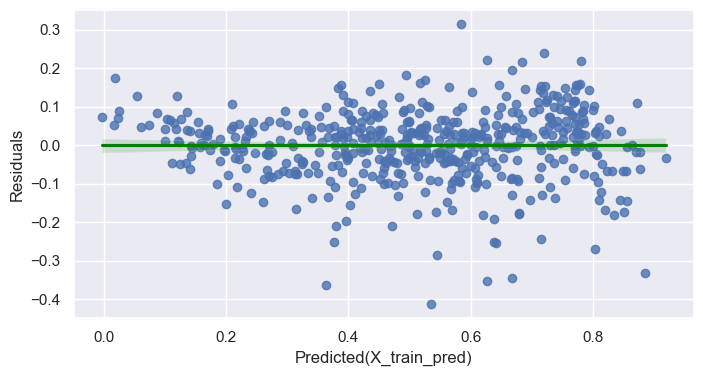

In [93]:
residuals = y_train - X_train_pred
# y_train_pred - y_train
plt.figure(figsize=(8,4))
sns.regplot(x=X_train_pred, y=residuals, line_kws={"color": "green"})
plt.xlabel("Predicted(X_train_pred)")
plt.ylabel("Residuals")
plt.show()

## <span style="color:maroon"><b>9.4. Assumption of How the predicted model close to actual value</b></span>

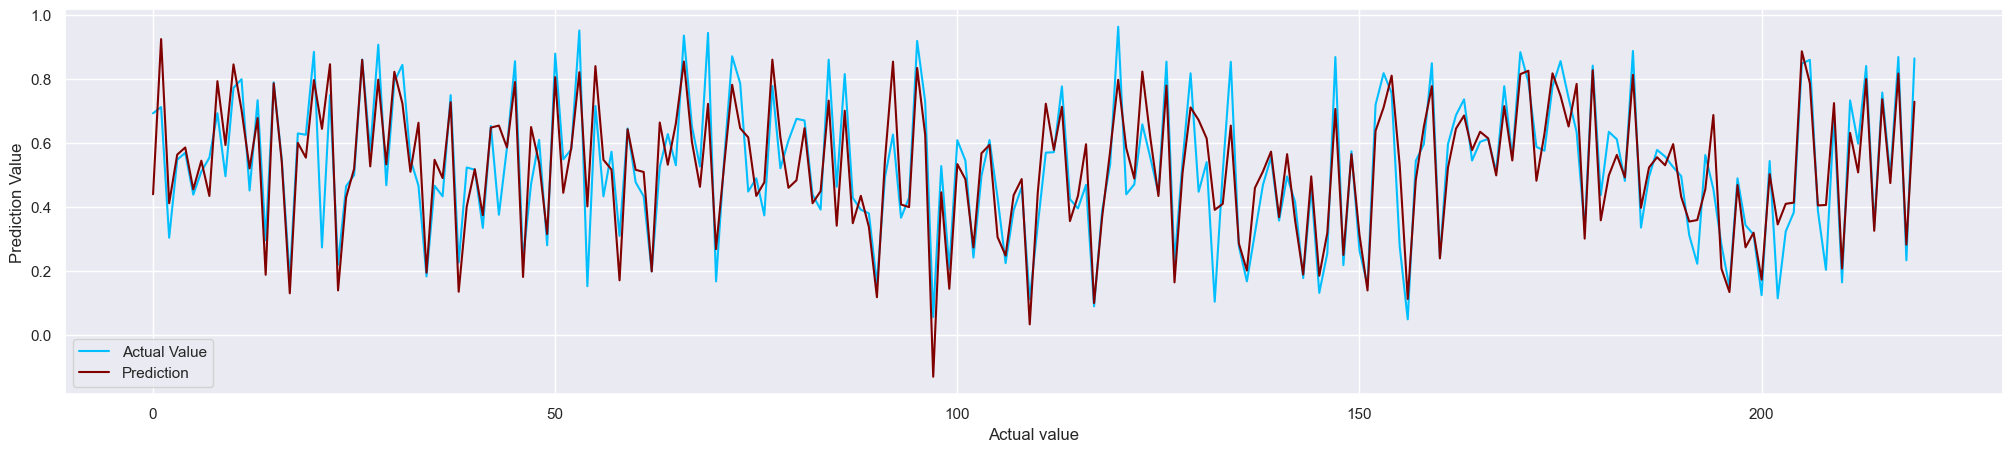

In [94]:
actual_value = y_test.to_list()
prediction = y_test_pred.to_list()
plt.figure(figsize=(25,5))
plt.rcParams.update({'font.size':18})
plt.plot(actual_value, color='deepskyblue', label='Actual Value')
plt.plot(prediction, color='maroon', label = 'Prediction')
plt.xlabel('Actual value')
plt.ylabel('Prediction Value')
plt.legend()
plt.show()

**Observation:**
- This graph shows how well the predicted values are merged with the actual values. 
- deepskyblue line is the actual value and maroon is the predicted one. To the maximum, both line are equally plotted.
- This proves our model is doing well in prediction

# <span style="color:teal"><b>10. Final Parameters and Conclusion</b></span>

## Correlation , coefficient

In [95]:
round(lr_model.params,4)

const                         0.07
temp                          0.55
windspeed                    -0.16
season_summer                 0.09
season_winter                 0.13
yr_2019                       0.23
mnth_Sep                      0.10
weekday_Sat                   0.07
workingday_working_day        0.06
weathersit_Heavy_rain_snow   -0.29
weathersit_Light_rain_snow   -0.08
dtype: float64

## VIF

In [96]:
final_vif # Thi VIF is already derived during Model Training

Features  VIF
0                        temp 4.76
1      workingday_working_day 4.04
2                   windspeed 3.44
3                     yr_2019 2.02
4                 weekday_Sat 1.69
5               season_summer 1.57
6  weathersit_Light_rain_snow 1.53
7               season_winter 1.40
8                    mnth_Sep 1.20
9  weathersit_Heavy_rain_snow 1.08

## Evaluation Metrics

In [97]:
print("Training Dataset R^2          -->", r2_score_train)
print("Test Dataset R^2              -->", r2_score_test)
print("Training Dataset Adjusted R^2 -->", adjusted_r2_train)
print("Test Dataset Adjusted R^2     -->", adjusted_r2_test)

Training Dataset R^2          --> 0.8352749595695672
Test Dataset R^2              --> 0.7961390438459766
Training Dataset Adjusted R^2 --> 0.8316
Test Dataset Adjusted R^2     --> 0.7854


## Conclusion:

- The given Correlation and coefficient and VIF, proves the facts obtained during Bivariate analysis of categorical variables and correlation observations in headmap() analysis.
- i.e., Bike ride count is high when temp is high, more in working days, less in Heavy Rain, less in weekdays, less in winter 
season and so on. 
---
- **Finally,**
    - Bike ride count is good in
        - Season Summer and Fall
        - Weekdays (Weekdays for registered customers, weekends for casual customers)
        - Months - from Apr to October
        - Weather Condition : Clear, Mild Cloudy, Light Rain
    - Bike ride count to improve in- 
        - Winter and Sprint
        - Encourage casual customers to avail bike service more during weekdays and encourage registered customers to avail bike service more during weekends
- Availing biker service is increasing year-on-year
- More bike services are availed during Fall and Summer seasons.
- During the months from Apr to Oct, the bike service is more availed by the customers.
- **In overall, availing bike service in all weekdays are same. However, Registered customers availed more during weekdays and casual customers availed more in weekends. Generically, when considering total ride count, all weekdays are same. But, in distinguished aspect of casual and registered cusotmers, all weekdays are not same.**
- **In point of adding proof to weekday analysis, 'working day' analysis again says the registered customers are more in working days and casual cutomers are more in non-working days. From, this we might consider registered customers as working professional who availing more bike service for office travel. Means, working professional avail more bike services**
- In weather situation, customers are more likely to avail bike services during clear or mild weather conditions.
---
<span style="color:maroon"><b>
Variables to Focus: Season (winter, spring), weathersit(heavy rain snow), temp(very low), weekend, months (jan, feb, nov, dec)</b></span>